In [73]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [118]:
# Reading all the CAR data
jan_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (01-12-25 - 01-18-25).xlsx')
jan_3_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (01-19-25 - 02-01-25).xlsx')
feb_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (02-02-25 - 02-15-25).xlsx')
feb_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (02-16-25 - 03-01-25).xlsx')
mar_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (03-02-25 - 03-15-25).xlsx')
apr_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (04-07-24 - 04-20-24).xlsx')
apr_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (04-21-24 - 05-04-24).xlsx')
may_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (05-05-24 - 05-18-24).xlsx')
may_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (05-19-24 - 06-01-24).xlsx')
jun_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (06-02-24 - 06-15-24).xlsx')
jun_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (06-16-24 - 06-29-24).xlsx')
jul_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (06-30-24 - 07-13-24).xlsx')
jul_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (07-14-24 - 07-27-24).xlsx')
aug_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (07-28-24 - 08-10-24).xlsx')
aug_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (08-11-24 - 08-24-24).xlsx')
sep_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (08-24-24 - 09-07-24).xlsx')
sep_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (09-08-24 - 09-21-24).xlsx')
sep_3_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (09-22-24 - 10-05-24).xlsx')
oct_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (10-06-24 - 10-19-24).xlsx')
oct_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (10-20-24 - 11-02-24).xlsx')
nov_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (11-03-24 - 11-16-24).xlsx')
nov_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (11-17-24 - 11-30-24).xlsx')
dec_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (12-01-24 - 12-14-24).xlsx')
dec_2_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (12-15-24 - 12-28-24).xlsx')
jan_1_activities = pd.read_excel('Call journey data/CAR - EP, Flow, Activity, Queue, & Agent Names (12-29-24 - 01-11-25).xlsx')

In [119]:
# Function for reformatting the CAR data
def car_cleaning(df):
    df.rename(columns = {'Time Zone: (UTC-05:00) Central Daylight Time (America/Chicago)': 'Contact Session ID',
                         'Unnamed: 1': 'EP Name',
                         'Unnamed: 2': 'Flow Name',
                         'Unnamed: 3': 'Activity Name',
                         'Unnamed: 4': 'Activity Start Timestamp',
                         'Unnamed: 5': 'Queue Name',
                         'Unnamed: 6': 'Agent Name'}, inplace = True)
    df = df.iloc[2:]
    df.reset_index(inplace = True, drop = True)
    return df


In [120]:
# Function for extracting the hour and day of the weak from Activity Start Timestamp
def time_extraction(df):
    df['Activity Start Timestamp'] = pd.to_datetime(df['Activity Start Timestamp'], format='mixed')
    df['Hour'] = df['Activity Start Timestamp'].dt.hour
    df['Hour Range'] = df['Hour'].apply(lambda h: f'{h}:00 - {h+1}:00' if h < 23 else '23:00 - 00:00')
    df['Day of Week'] = df['Activity Start Timestamp'].dt.day_name()
    return df

In [121]:
# Reformatting and extracting the time of the CAR data
car_data = [jan_1_activities, jan_2_activities, jan_3_activities, feb_1_activities, feb_2_activities,
                     mar_1_activities, apr_1_activities, apr_2_activities, may_1_activities, may_2_activities,
                     jun_1_activities, jun_2_activities, jul_1_activities, jul_2_activities, aug_1_activities,
                     aug_2_activities, sep_1_activities, sep_2_activities, sep_3_activities, oct_1_activities, oct_2_activities,
                     nov_1_activities, nov_2_activities, dec_1_activities, dec_2_activities]

for i in range(len(car_data)):
    car_data[i] = car_cleaning(car_data[i])
    car_data[i] = time_extraction(car_data[i])

(jan_1_activities, jan_2_activities, jan_3_activities, feb_1_activities, feb_2_activities,
                     mar_1_activities, apr_1_activities, apr_2_activities, may_1_activities, may_2_activities,
                     jun_1_activities, jun_2_activities, jul_1_activities, jul_2_activities, aug_1_activities,
                     aug_2_activities, sep_1_activities, sep_2_activities, sep_3_activities, oct_1_activities, oct_2_activities,
                     nov_1_activities, nov_2_activities, dec_1_activities, dec_2_activities) = car_data

In [122]:
# Combining all the CAR data into one dataframe
all_car_data = pd.concat([jan_1_activities, jan_2_activities, jan_3_activities, feb_1_activities, feb_2_activities,
                     mar_1_activities, apr_1_activities, apr_2_activities, may_1_activities, may_2_activities,
                     jun_1_activities, jun_2_activities, jul_1_activities, jul_2_activities, aug_1_activities,
                     aug_2_activities, sep_1_activities, sep_3_activities, oct_1_activities, oct_2_activities,
                     nov_1_activities, nov_2_activities, dec_1_activities, dec_2_activities])

In [123]:
# Re-organizing the CAR data by month
all_car_data['Month'] = all_car_data['Activity Start Timestamp'].dt.month

monthly_dfs = {month: df for month, df in all_car_data.groupby('Month')}

jan_car = monthly_dfs[1]
feb_car = monthly_dfs[2]
mar_car = monthly_dfs[3]
apr_car = monthly_dfs[4]
may_car = monthly_dfs[5]
jun_car = monthly_dfs[6]
jul_car = monthly_dfs[7]
aug_car = monthly_dfs[8]
sep_car = monthly_dfs[9]
oct_car = monthly_dfs[10]
nov_car = monthly_dfs[11]
dec_car = monthly_dfs[12]

In [124]:
# Checking the Menu(s) corresponding to FrontDeskTransfer activity name
all_car_data.loc[all_car_data['Activity Name'] == 'FrontDeskTransfer', :]['EP Name'].unique()

array(['Legal Menu Telephony EP'], dtype=object)

In [125]:
# Checking the Menu(s) corresponding to FrontDeskTransfer1 activity name
all_car_data.loc[all_car_data['Activity Name'] == 'FrontDeskTransfer1', :]['EP Name'].unique()

array(['Main Number Telephony EP'], dtype=object)

In [126]:
# Checking the Menu(s) corresponding to FrontDeskTransfer2 activity name
all_car_data.loc[all_car_data['Activity Name'] == 'FrontDeskTransfer2', :]['EP Name'].unique()

array(['Main Number Telephony EP'], dtype=object)

In [127]:
# Checking the Menu(s) corresponding to FrontDeskTransfer3 activity name
all_car_data.loc[all_car_data['Activity Name'] == 'FrontDeskTransfer3', :]['EP Name'].unique()

array(['Main Number Telephony EP'], dtype=object)

In [128]:
# Create the full list of expected hour range labels (0 to 23)
hour_ranges = [f'{h}:00 - {h+1}:00' if h < 23 else '23:00 - 00:00' for h in range(24)]

# Now plot using that safe order
def plot_hours(df, ylim):
    plt.figure(figsize=(12,6))
    ax = sns.countplot(data=df, x='Hour Range', order=hour_ranges, palette='Pastel2')
    ax.set_ylim(top=ylim)

    # Rotate labels
    plt.xticks(rotation=45)

    # Annotate values on bars
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            ax.annotate(count,
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', fontsize=9)

    plt.title('Activity Frequency by Hour Range')
    plt.xlabel('Hour Range')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

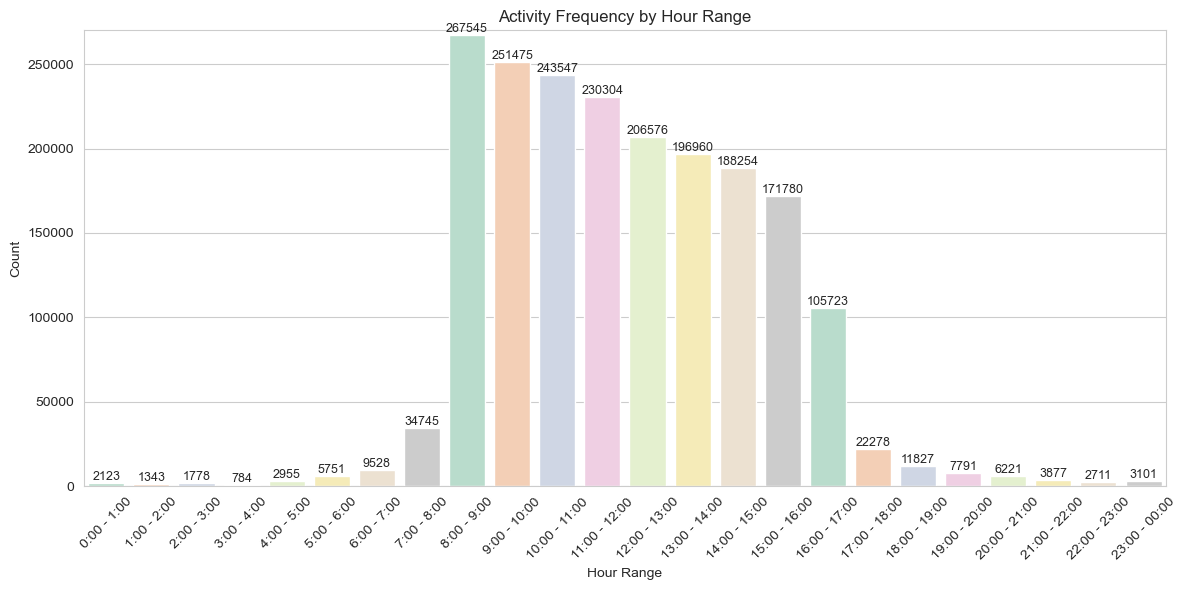

In [129]:
# Plotting Activity Frequency by Hour Range for All CAR Data
plot_hours(all_car_data, 270000)

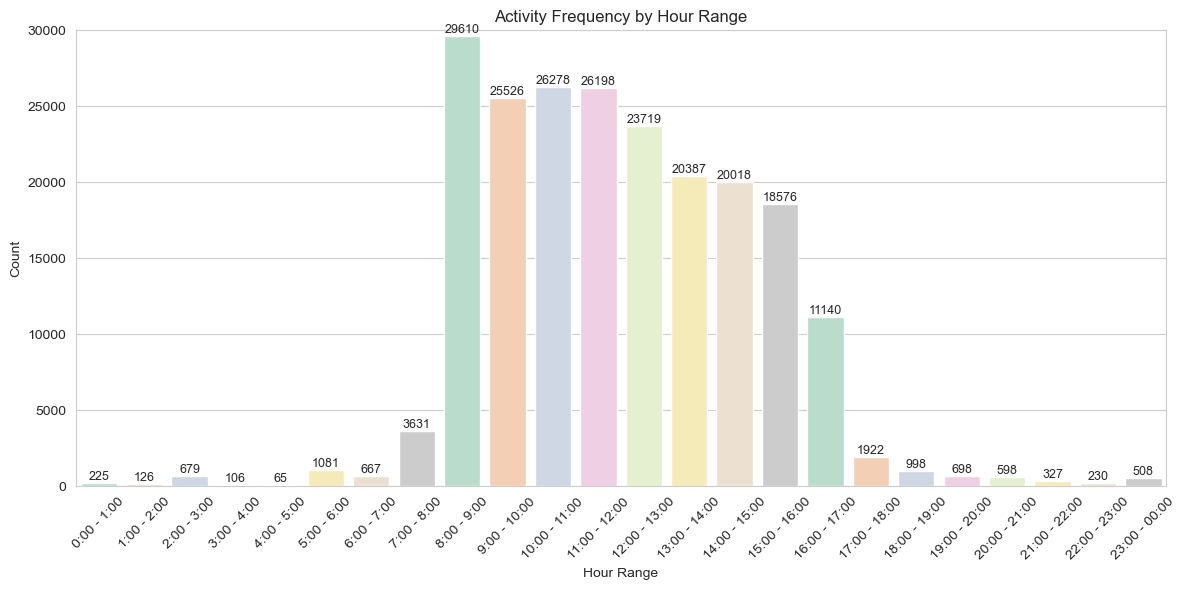

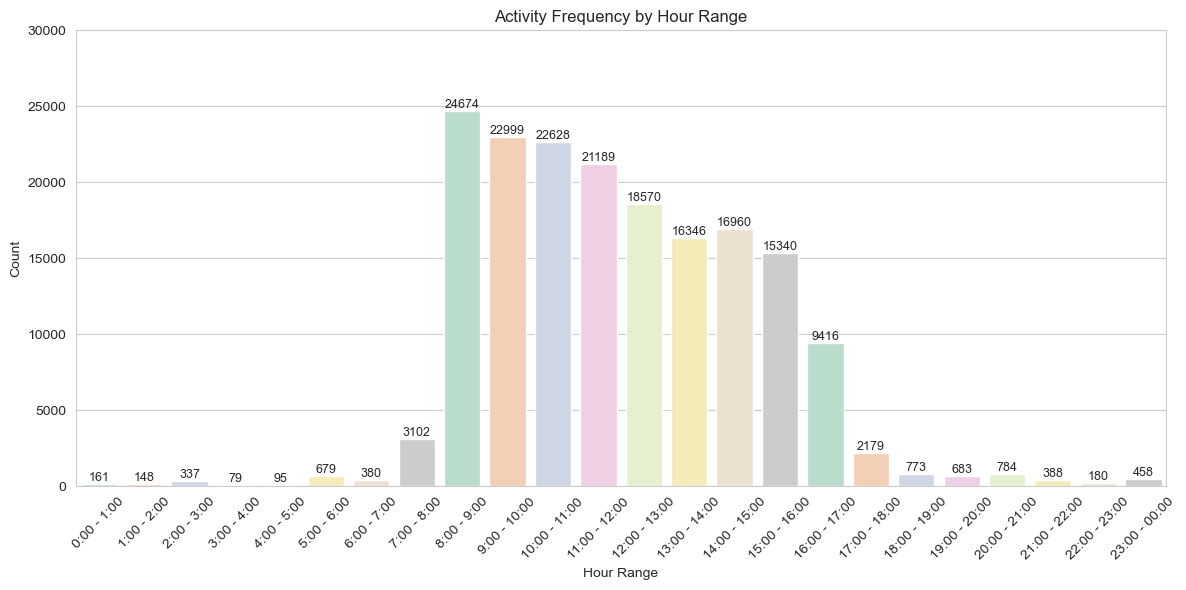

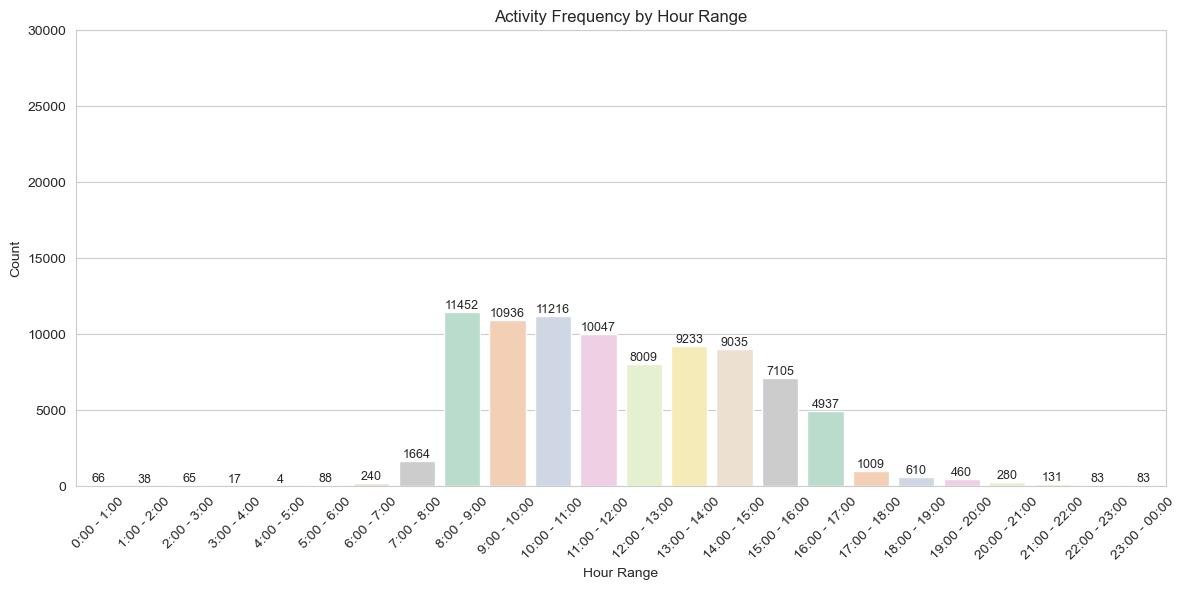

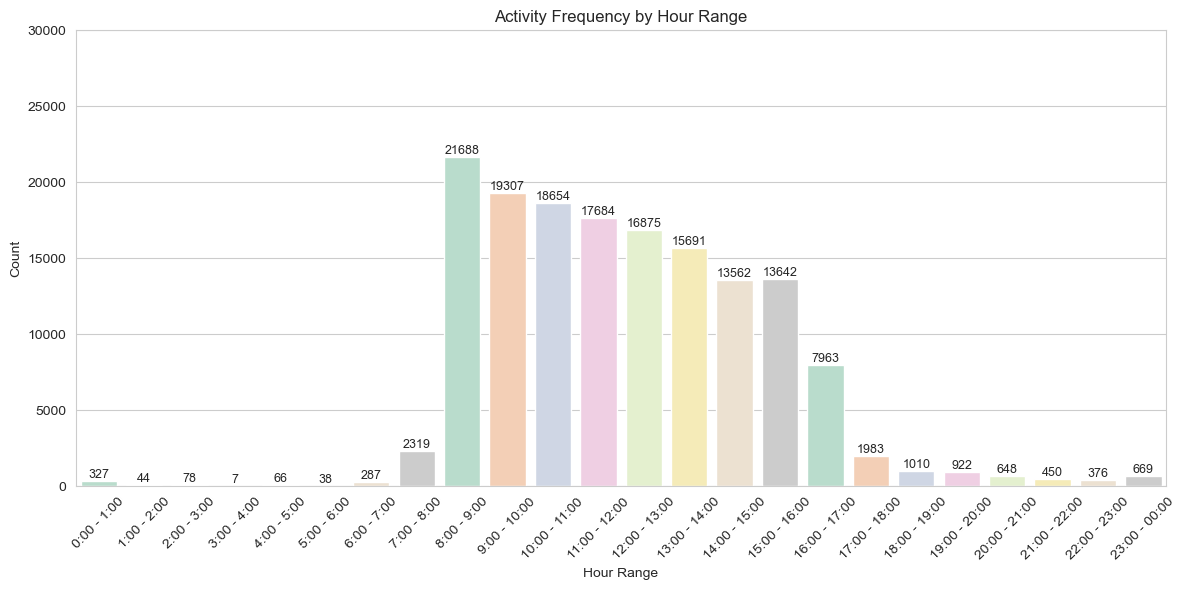

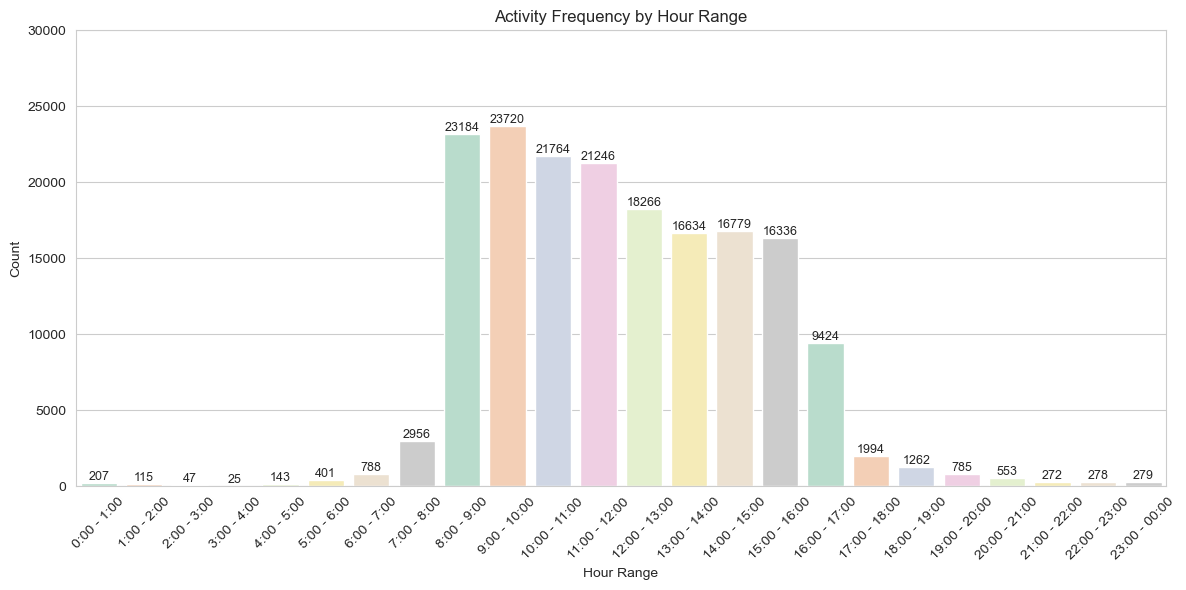

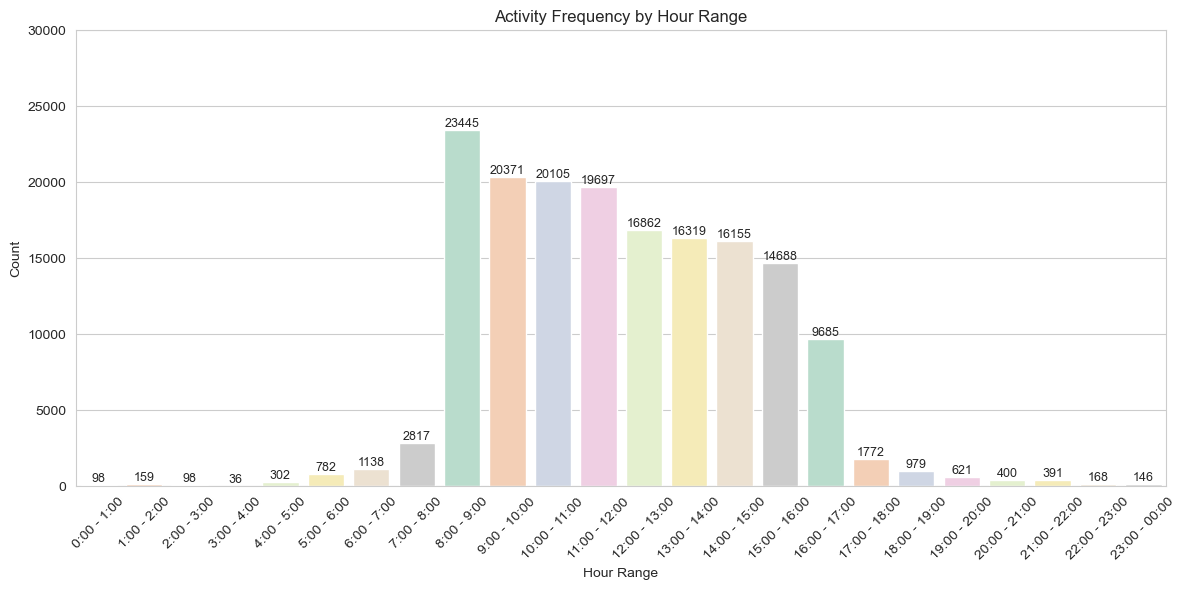

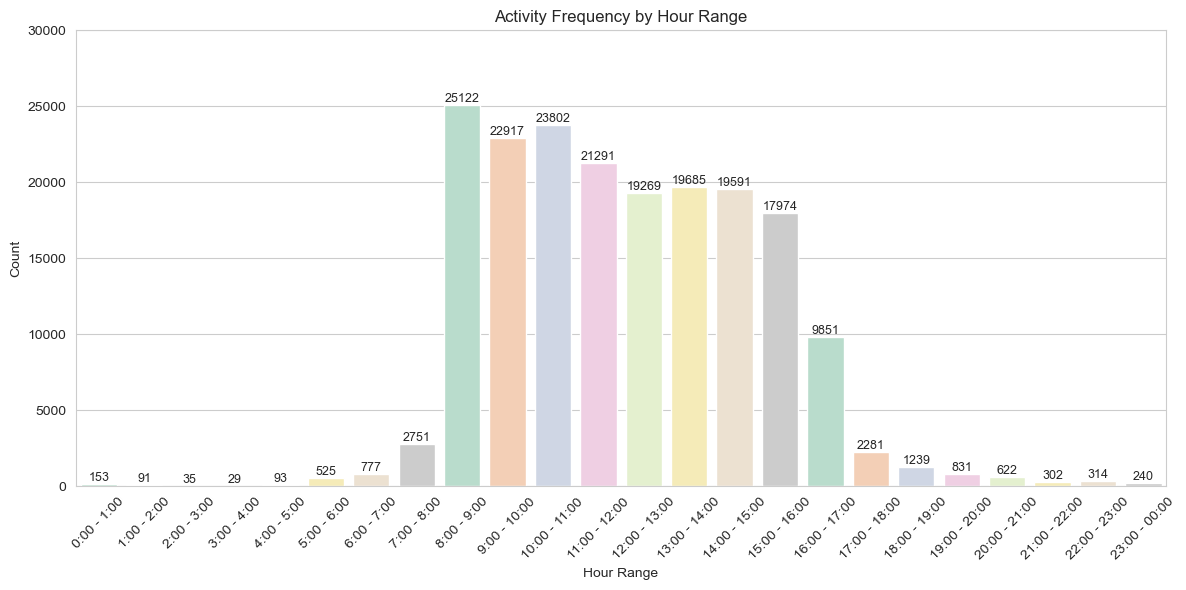

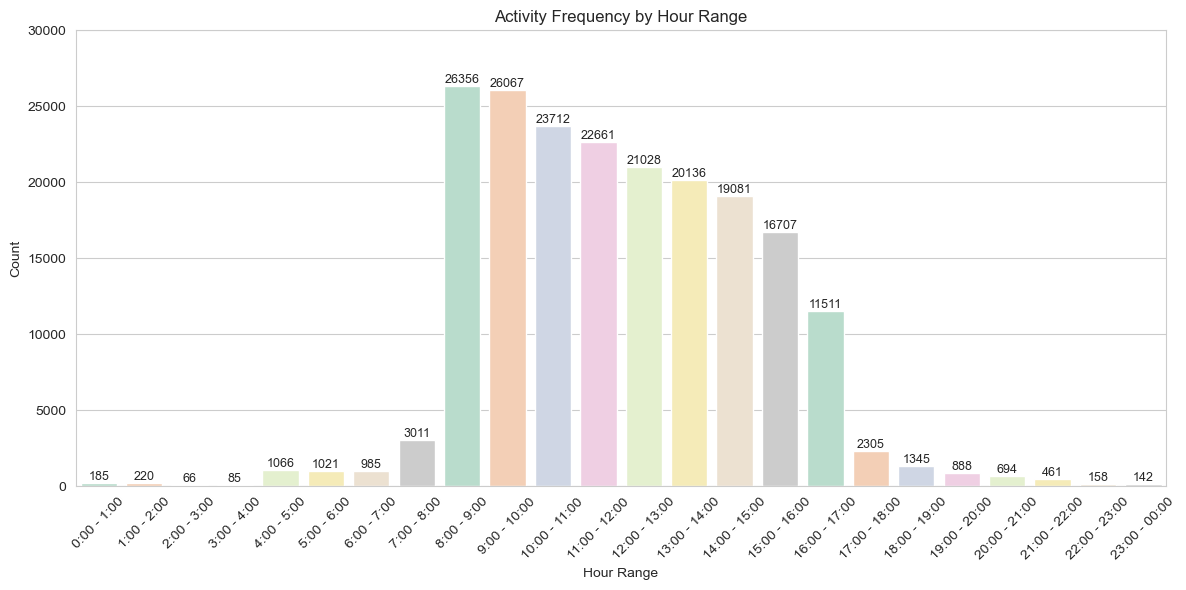

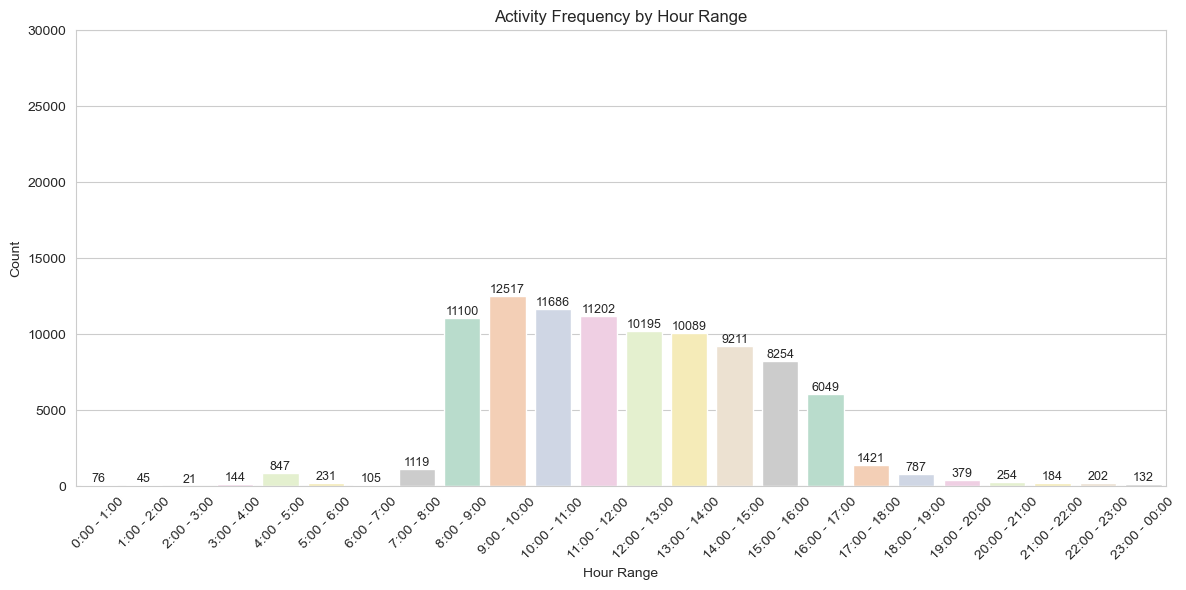

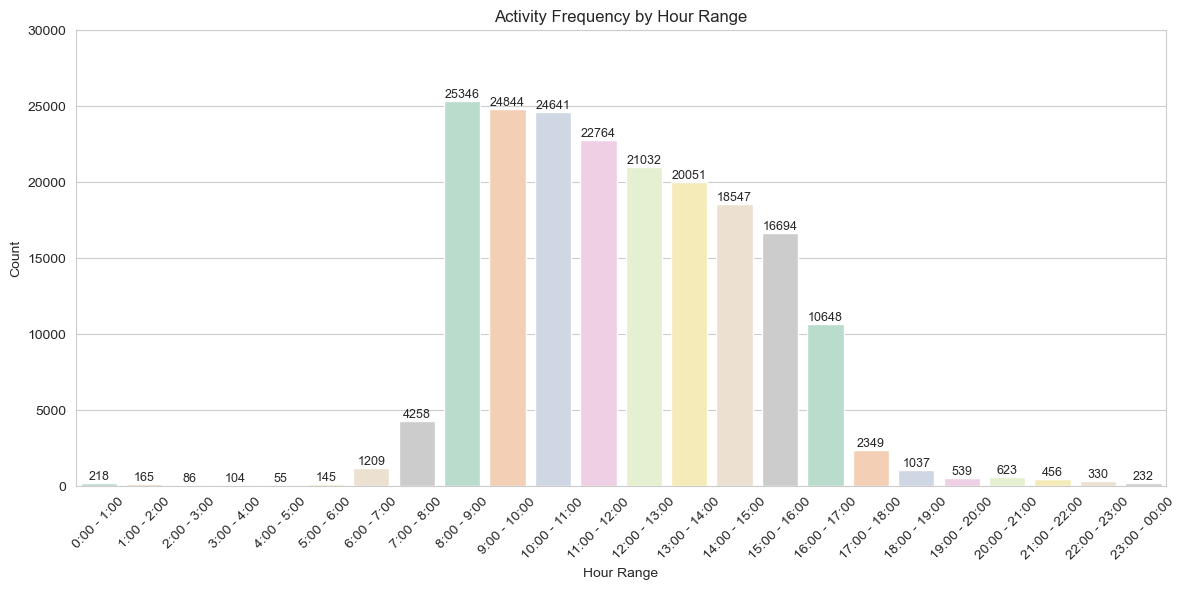

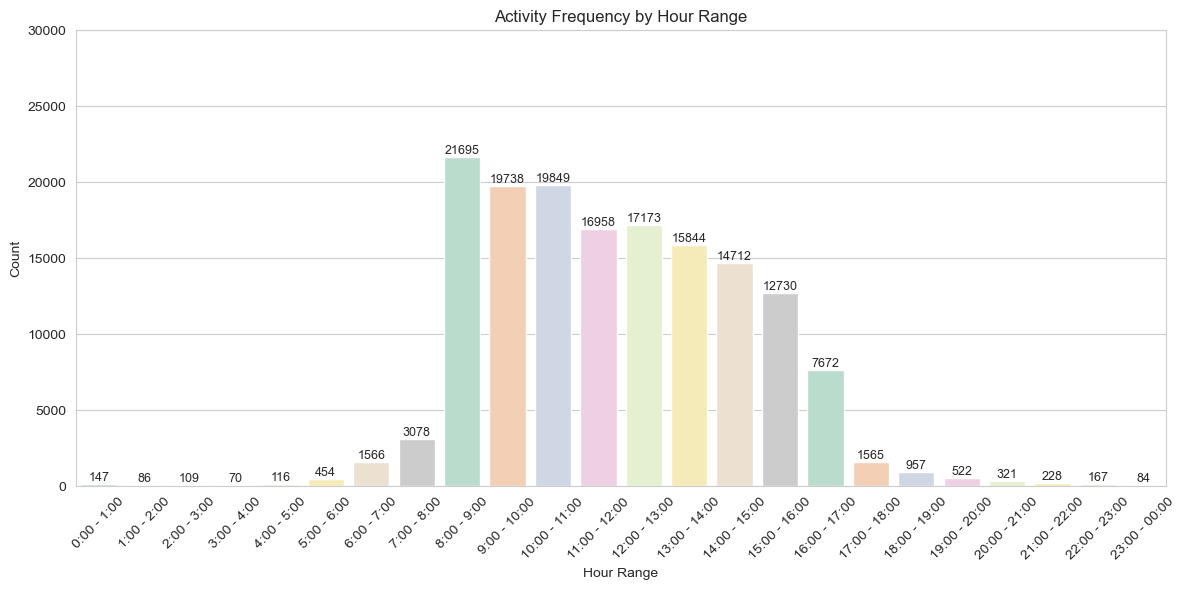

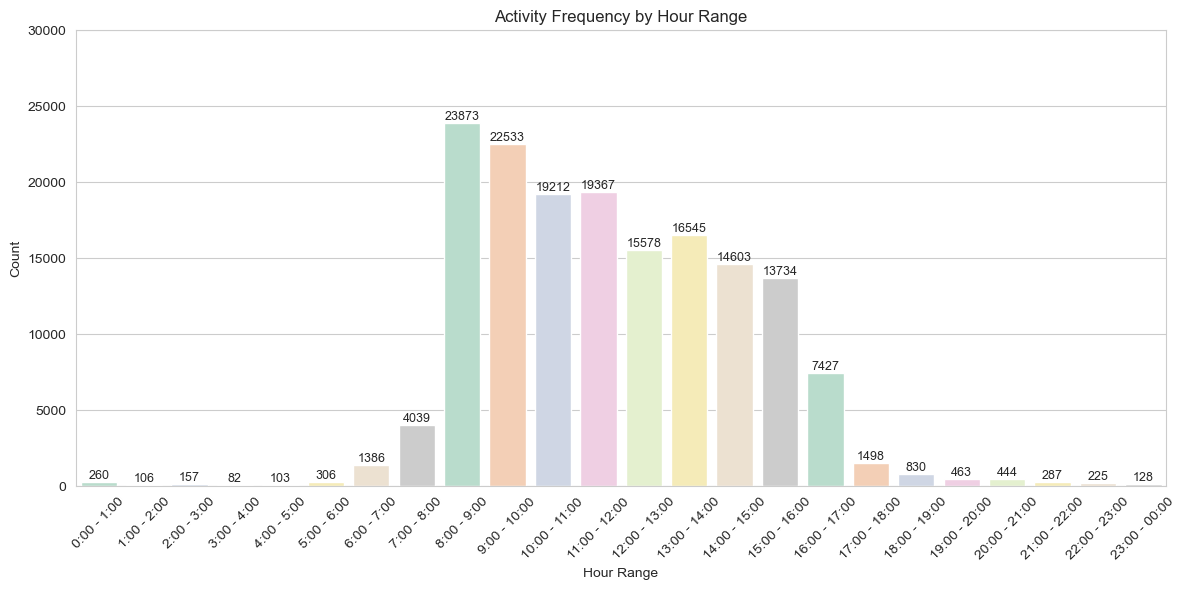

In [130]:
# Outputting Activity Frequency by Hour Range for each month
for i in range(1, 13):
    plot_hours(monthly_dfs[i], ylim = 30000)

In [131]:
# Function for plotting the frequency by day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def days_of_week(df, ylim):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=df, x='Day of Week', order=days_order, palette='Pastel2')
    ax.set_ylim(top=ylim)


    # Add labels manually to each bar
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(str(height),
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10)

    plt.title('Activity Frequency by Day of Week')
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


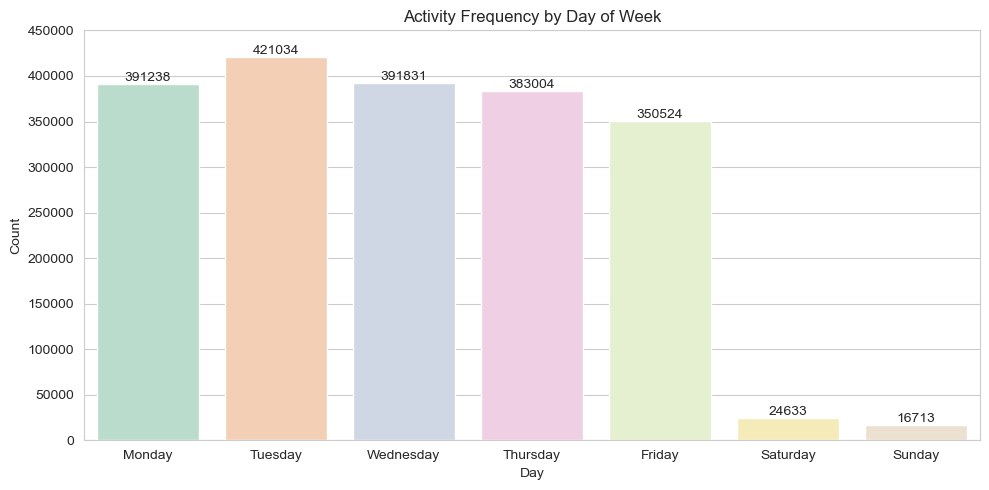

In [132]:
# Plotting the Activity Frequency by Day of Week of All CAR Data
days_of_week(all_car_data, 450000)

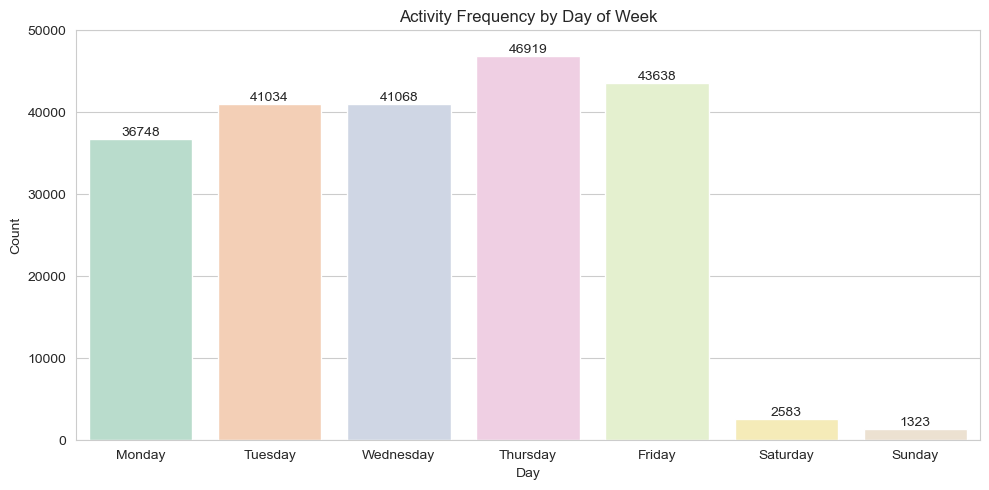

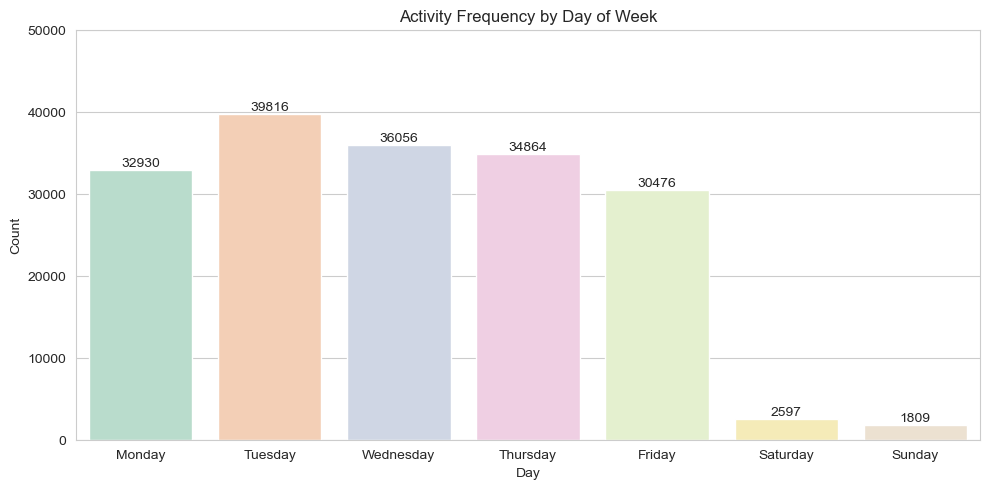

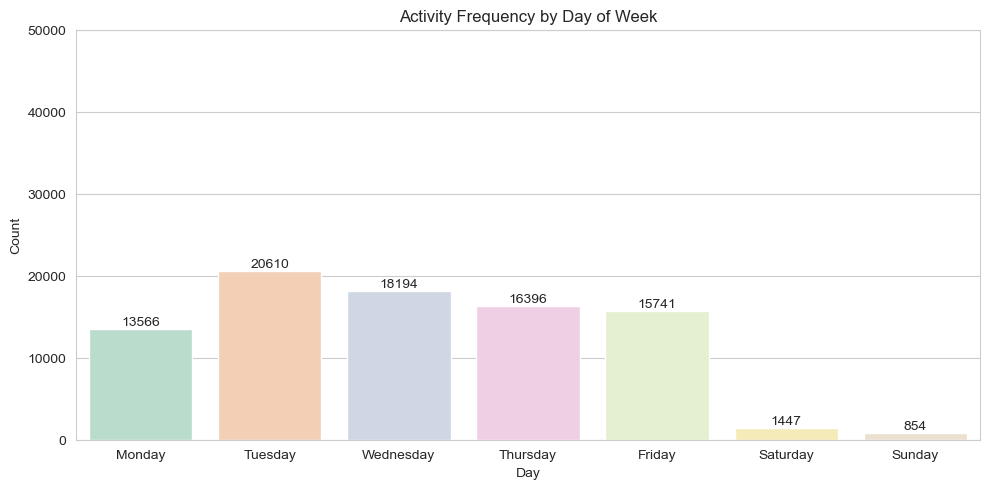

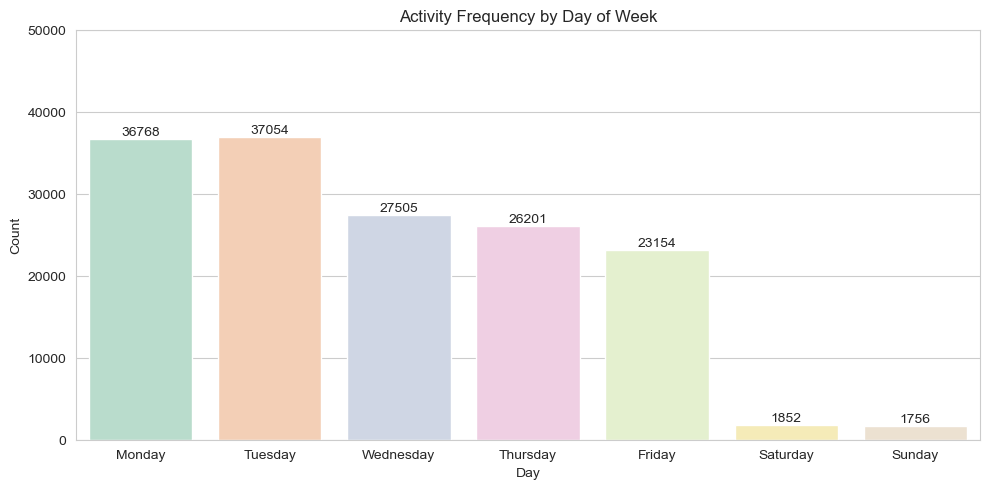

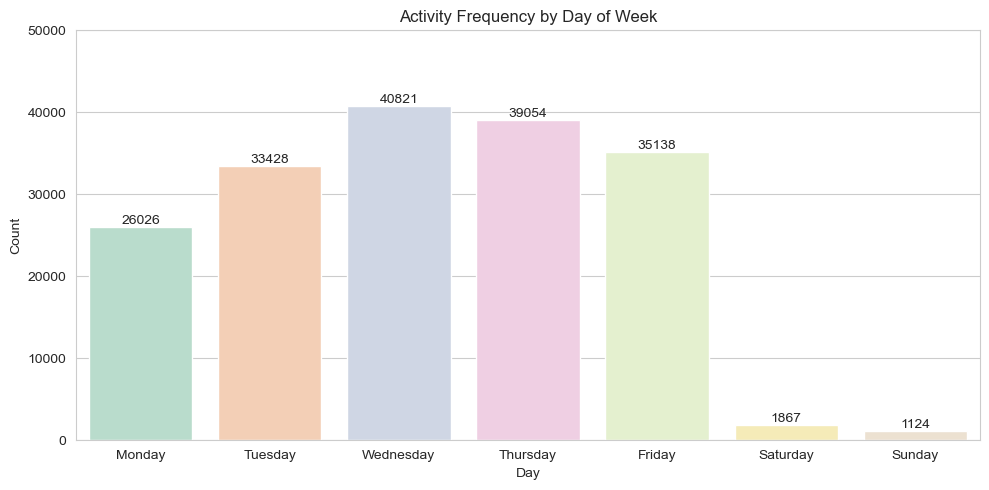

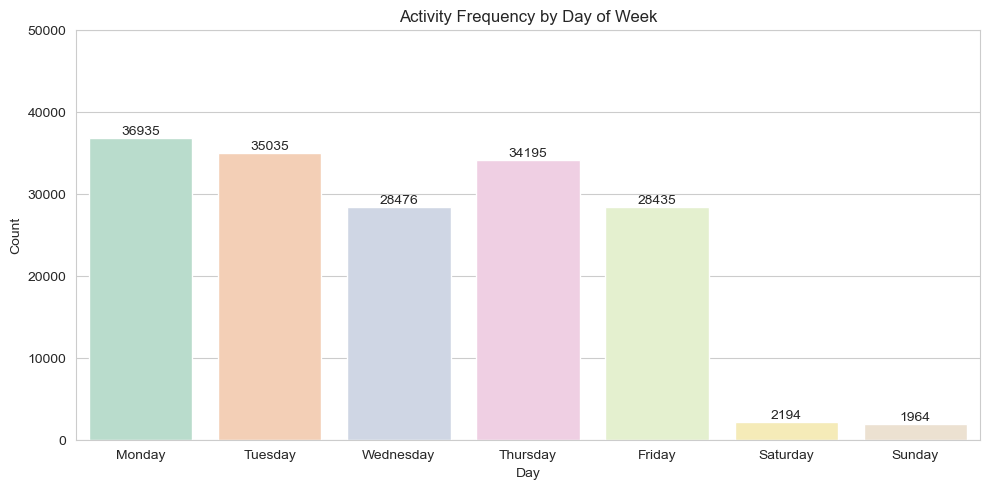

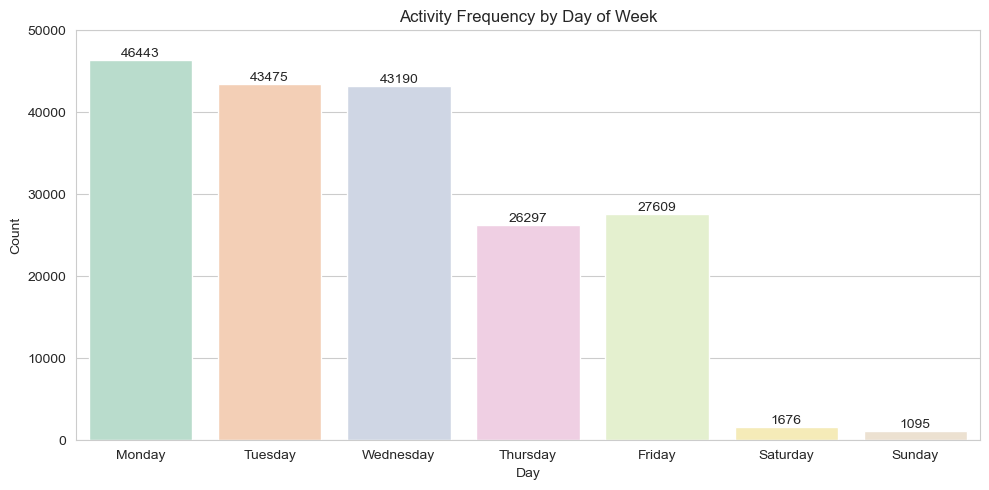

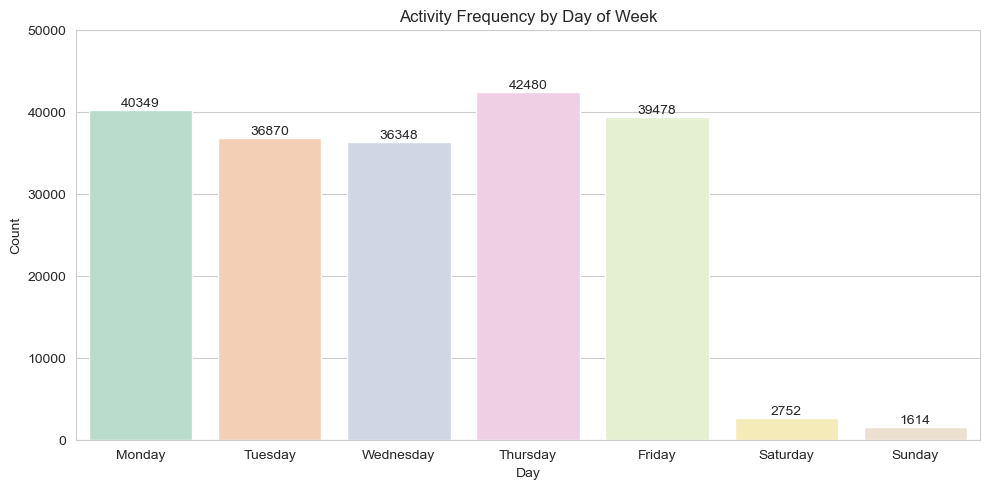

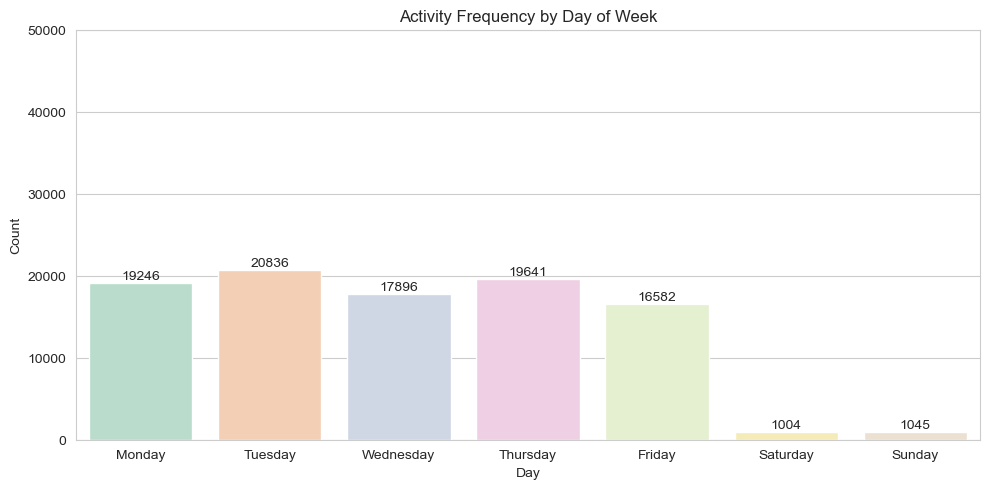

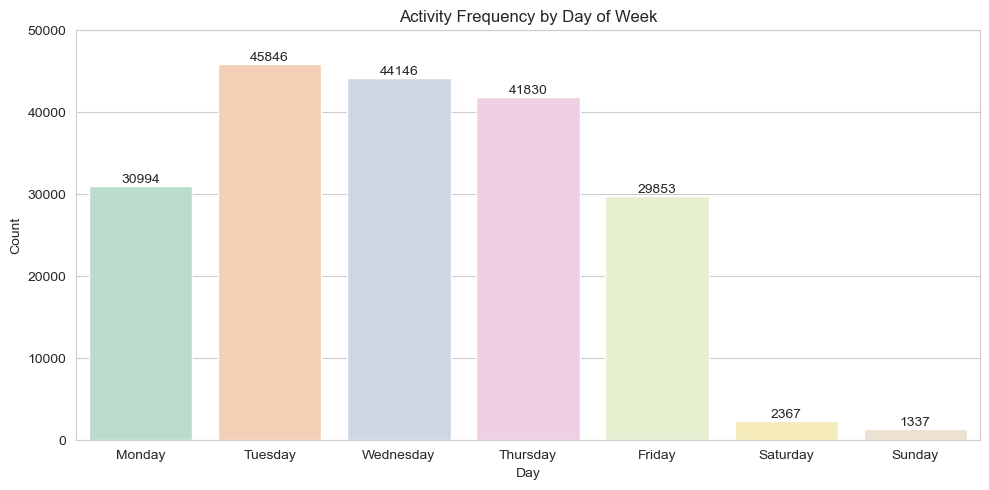

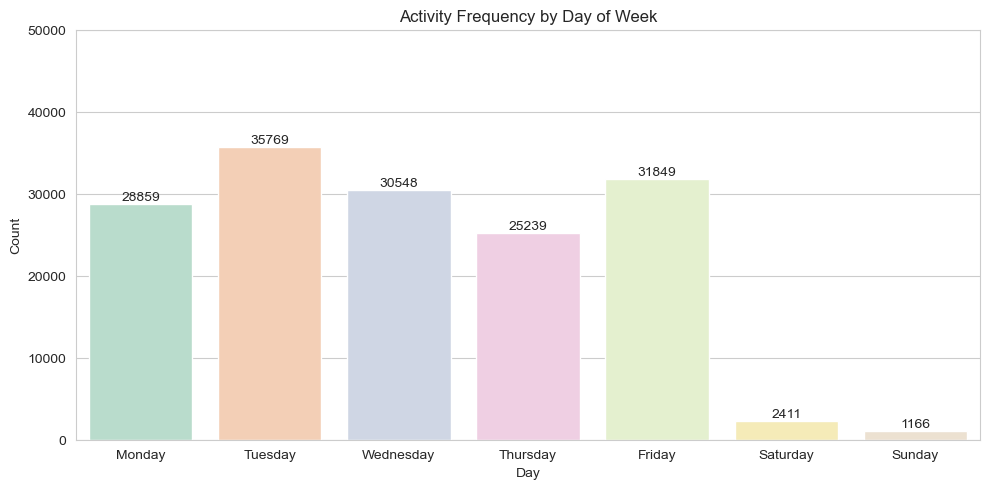

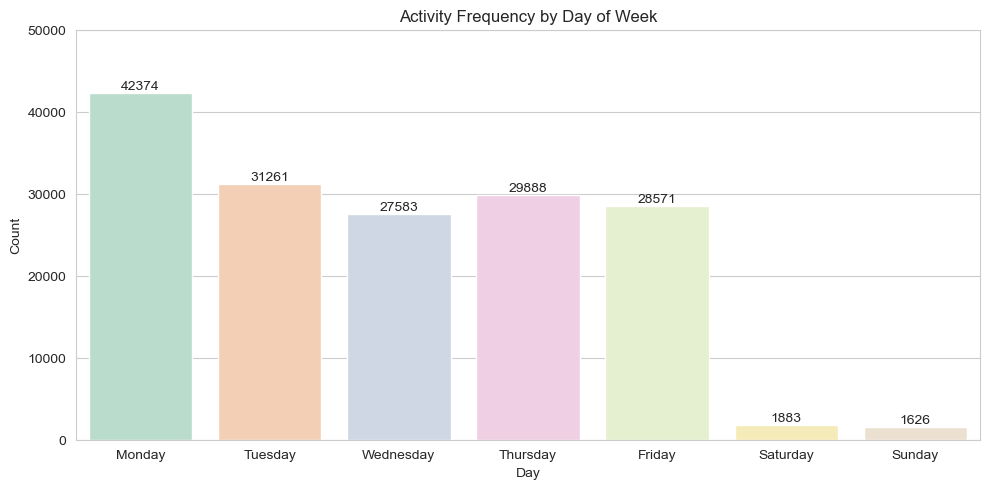

In [133]:
for i in range(1, 13):
    days_of_week(monthly_dfs[i], 50000)

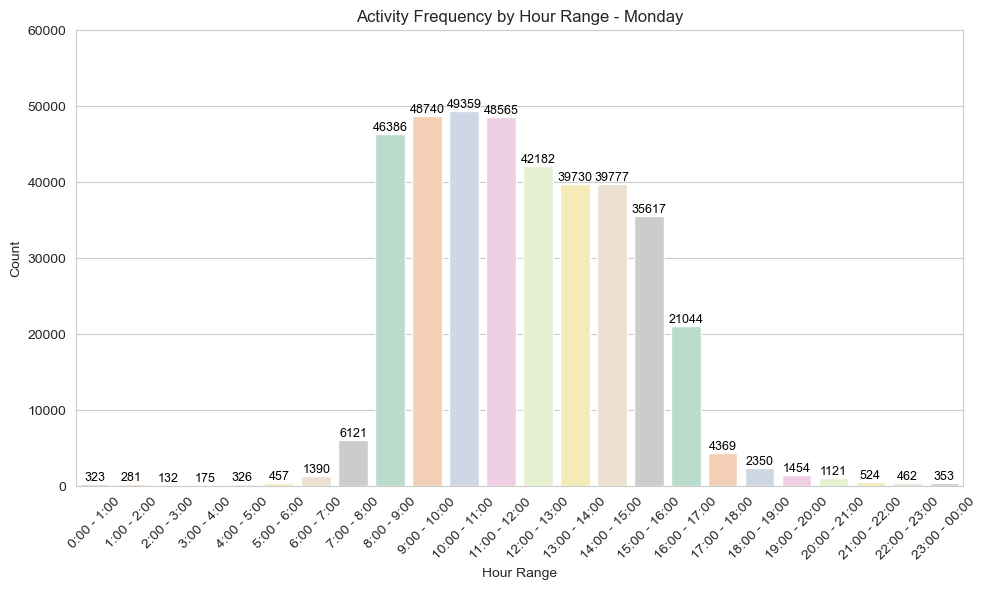

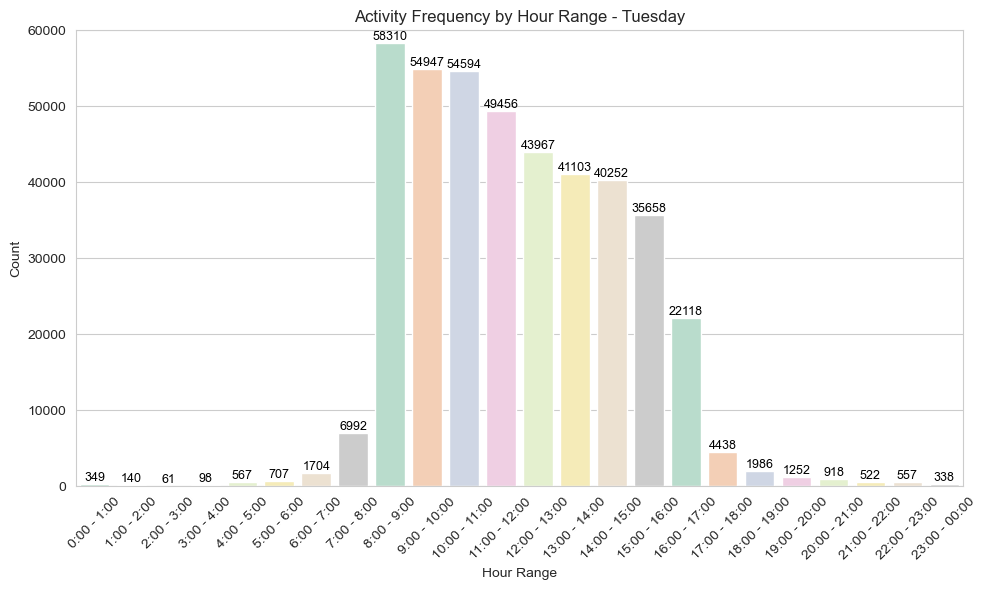

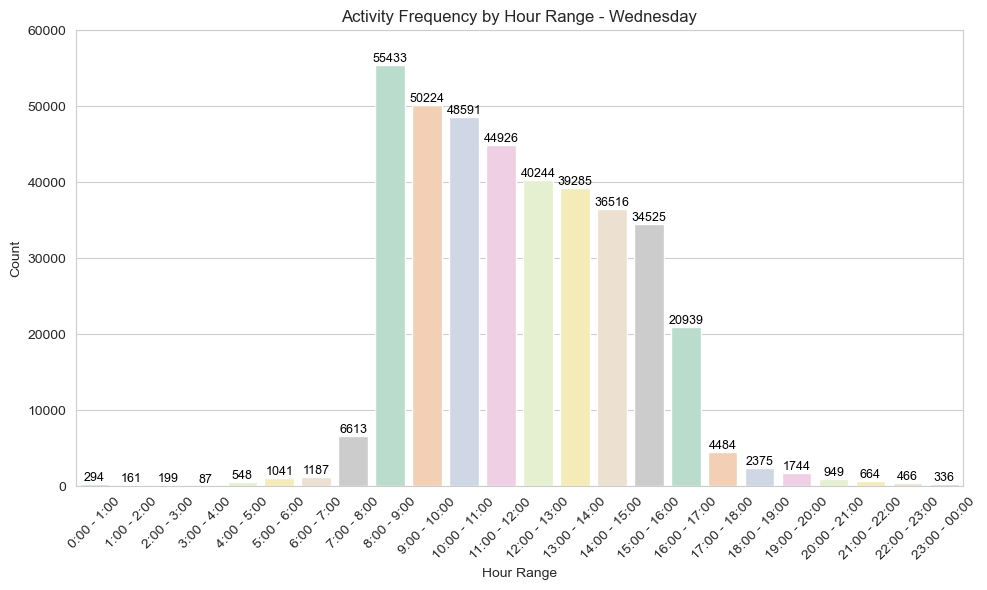

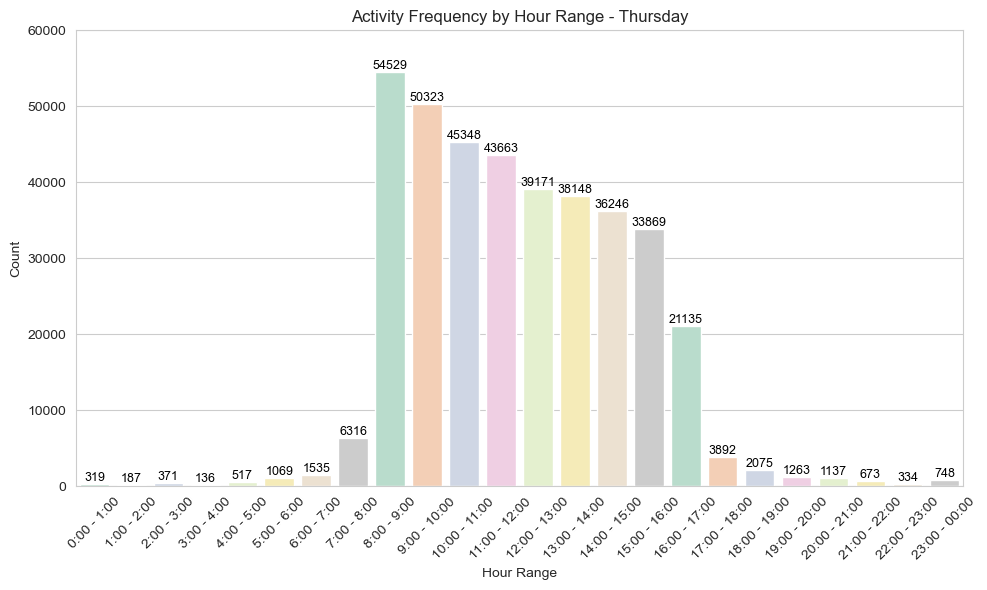

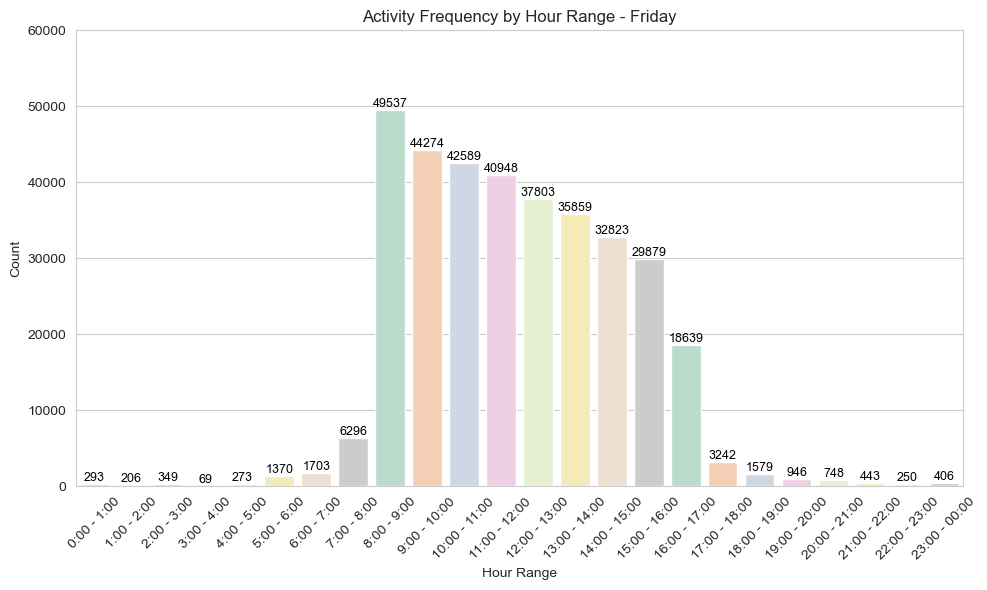

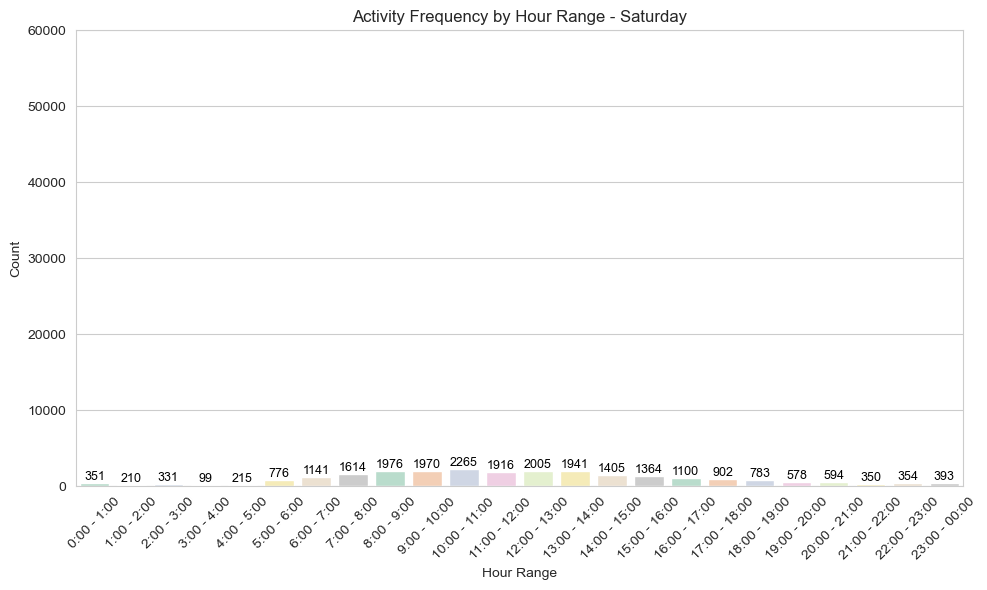

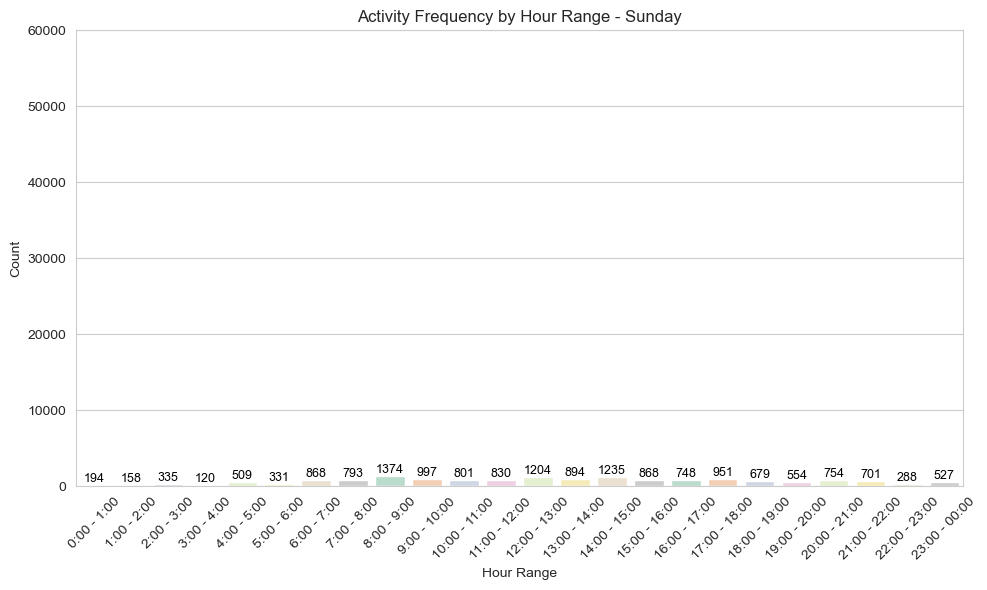

In [134]:
# Define order for hours and days
hour_order = [
    '0:00 - 1:00', '1:00 - 2:00', '2:00 - 3:00', '3:00 - 4:00', '4:00 - 5:00',
    '5:00 - 6:00', '6:00 - 7:00', '7:00 - 8:00', '8:00 - 9:00', '9:00 - 10:00',
    '10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '13:00 - 14:00',
    '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00', '17:00 - 18:00',
    '18:00 - 19:00', '19:00 - 20:00', '20:00 - 21:00', '21:00 - 22:00',
    '22:00 - 23:00', '23:00 - 00:00'
]

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Loop over each day and plot
for day in day_order:
    day_df = all_car_data[all_car_data['Day of Week'] == day]
    hour_counts = day_df['Hour Range'].value_counts().reindex(hour_order, fill_value=0)

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='Pastel2')
    bars.set_ylim(top = 60000)
    plt.title(f'Activity Frequency by Hour Range - {day}')
    plt.xlabel("Hour Range")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    
    # Annotate bar values
    for p in bars.patches:
        height = p.get_height()
        if height > 0:
            bars.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='bottom', fontsize=9, color='black', rotation=0)

    plt.tight_layout()
    plt.show()


In [135]:
# Checking for the number of unique Activity Names in All LAC Queue Telephony EP
all_car_data.loc[(all_car_data['EP Name'].isna()) & (all_car_data['Activity Name'].isna()), :]

,Contact Session ID,EP Name,Flow Name,Activity Name,Activity Start Timestamp,Queue Name,Agent Name,Hour,Hour Range,Day of Week,Month
1,32e18afd-575b-4d92-b555-6f841bb868fb,NaN,LACMain,NaN,2024-12-29 00:35:17,NaN,NaN,0,0:00 - 1:00,Sunday,12
6,56943dcf-95d2-4ffa-8655-26e07996a6b7,NaN,LACMain,NaN,2024-12-29 07:12:15,NaN,NaN,7,7:00 - 8:00,Sunday,12
13,5efdd46b-dc2a-44fa-a4be-ddd5e5b15942,NaN,LACMain,NaN,2024-12-29 07:12:19,NaN,NaN,7,7:00 - 8:00,Sunday,12
19,ae24b321-0d68-4056-831b-f50971290bda,NaN,LACMain,NaN,2024-12-29 07:12:22,NaN,NaN,7,7:00 - 8:00,Sunday,12
26,56dcb8c1-fdab-4a08-bc5c-f421e0dec947,NaN,LACMain,NaN,2024-12-29 07:12:25,NaN,NaN,7,7:00 - 8:00,Sunday,12
...,...,...,...,...,...,...,...,...,...,...,...
62118,826bcc31-a671-42e3-a829-909a4e7dea07,NaN,ClosedHoursHolidaysMenu,NaN,2024-12-28 19:29:23,NaN,NaN,19,19:00 - 20:00,Saturday,12
62122,ec0cf4bf-75d4-4aa8-a19a-5c806fa94af3,NaN,LACMain,NaN,2024-12-28 19:52:41,NaN,NaN,19,19:00 - 20:00,Saturday,12
62127,e2dcc734-f88f-4a60-96bb-c20b237db4e4,NaN,FarmworkerMain,NaN,2024-12-28 20:00:25,NaN,NaN,20,20:00 - 21:00,Saturday,12
62133,28c5e1c7-208c-4fcc-a16c-1732741764e1,NaN,FarmworkerMain,NaN,2024-12-28 21:45:36,NaN,NaN,21,21:00 - 22:00,Saturday,12


In [136]:
# Filling null EP names and Activity Name with the most recent EP name with the same Contact Session ID
all_car_data['EP Name'] = all_car_data.groupby('Contact Session ID')['EP Name'].transform(lambda x: x.fillna(method='ffill'))
all_car_data['Activity Name'] = all_car_data.groupby('Contact Session ID')['Activity Name'].transform(lambda x: x.fillna(method='ffill'))

In [137]:
# Step 2: Group by EP Name and Activity Name, and count frequency
activity_counts = all_car_data.groupby(['EP Name'])['Activity Name'].value_counts().reset_index(name='Count')

In [58]:
# Function for determining the Activity Name of each EP Name group
def activity_name_trends(df):
   return df.groupby(['EP Name'])['Activity Name'].value_counts().reset_index(name = 'Count') 

# Function for determining the Queue Name of each EP Name group
def queue_trends(df):
    return df.groupby(['Contact Session ID','EP Name'])['Queue Name'].value_counts().reset_index(name = 'Count')

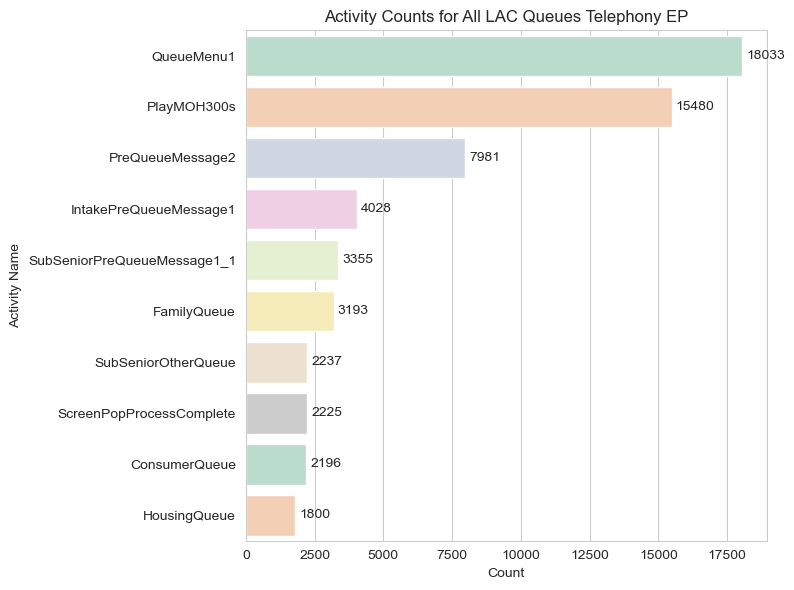

In [138]:
# Plotting top 10 Activity Trends of All LAC Queues Telephony EP
all_car_activity_trends = activity_name_trends(all_car_data)
main_menu = all_car_activity_trends.loc[all_car_activity_trends['EP Name'] == 'All LAC Queues Telephony EP', :].head(10)

grouped = main_menu.groupby('EP Name')

for ep_name, group in grouped:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=group.sort_values('Count', ascending=False), 
                     x='Count', y='Activity Name', palette='Pastel2')

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    plt.title(f'Activity Counts for {ep_name}')
    plt.xlabel('Count')
    plt.ylabel('Activity Name')
    plt.tight_layout()
    plt.show()


In [147]:
# Function for plotting activity trends of each inputted month
def activity_plots(df):
    trends = activity_name_trends(df)
    grouped = trends.groupby('EP Name')

    for ep_name, group in grouped:
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(data=group.sort_values('Count', ascending=False), 
                        x='Count', y='Activity Name', palette='Pastel2')

        # Add value labels
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize = 12)

        plt.title(f'Activity Counts for {ep_name}', fontsize=15)
        plt.xlabel('Count', fontsize = 14)
        plt.ylabel('Activity Name', fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.tight_layout()
        plt.show()


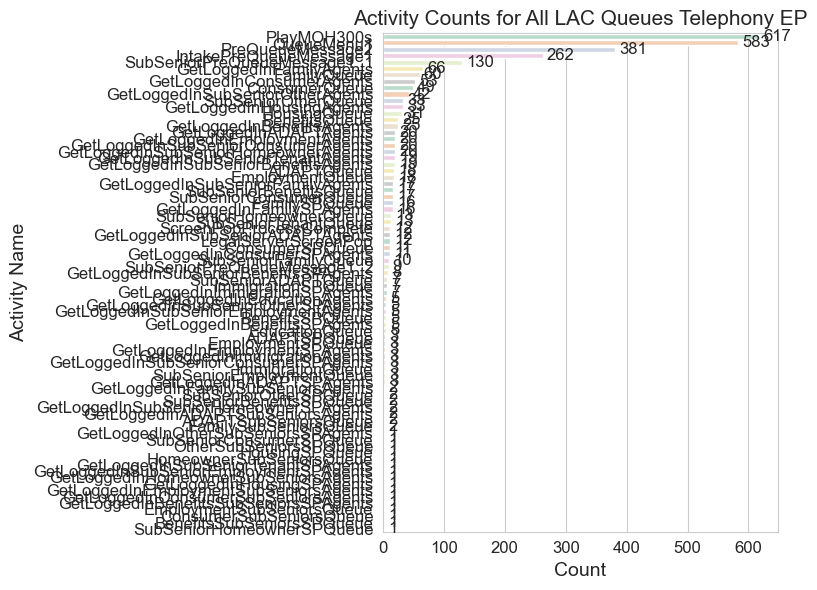

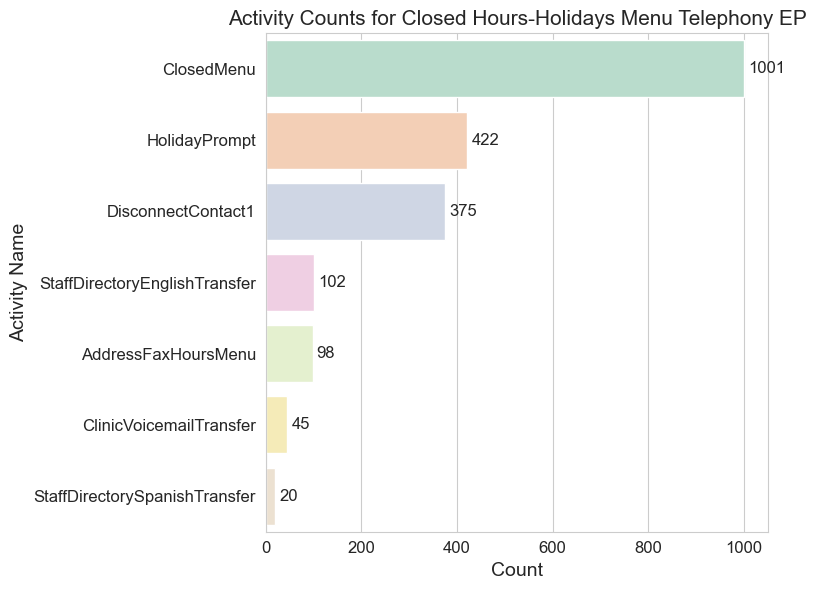

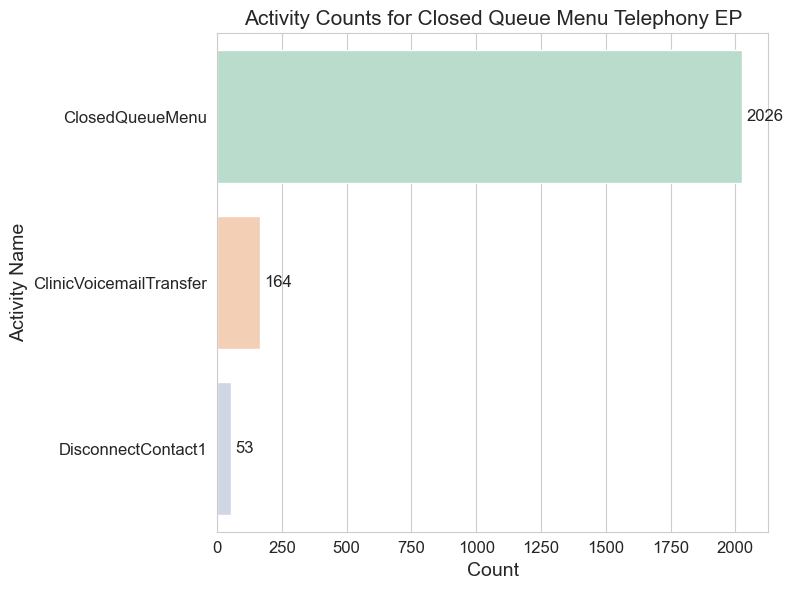

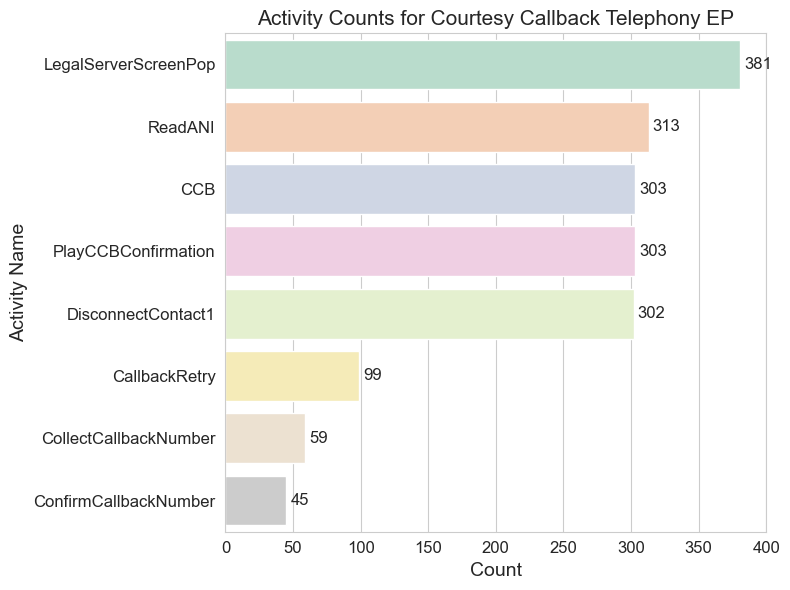

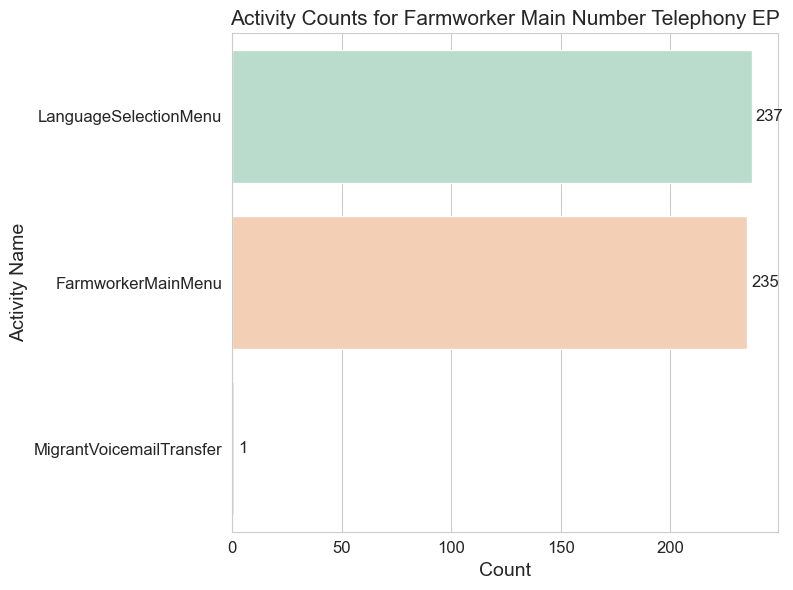

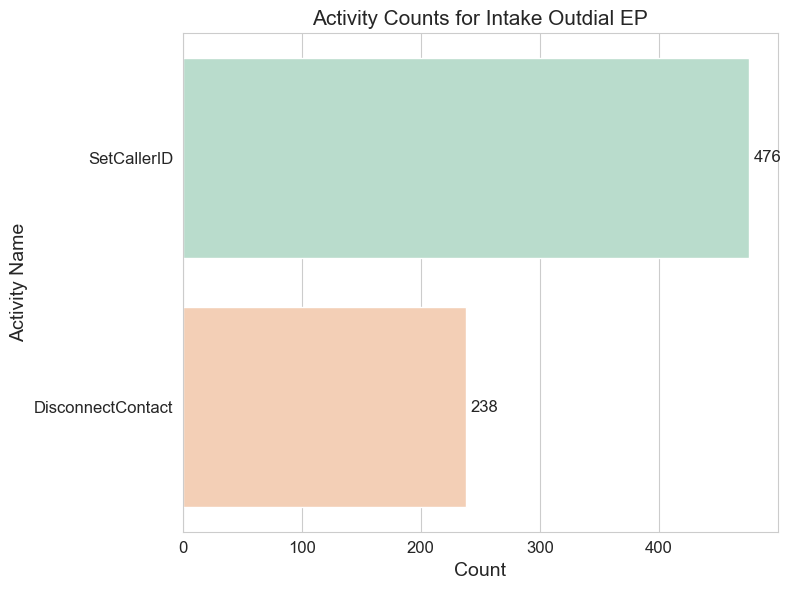

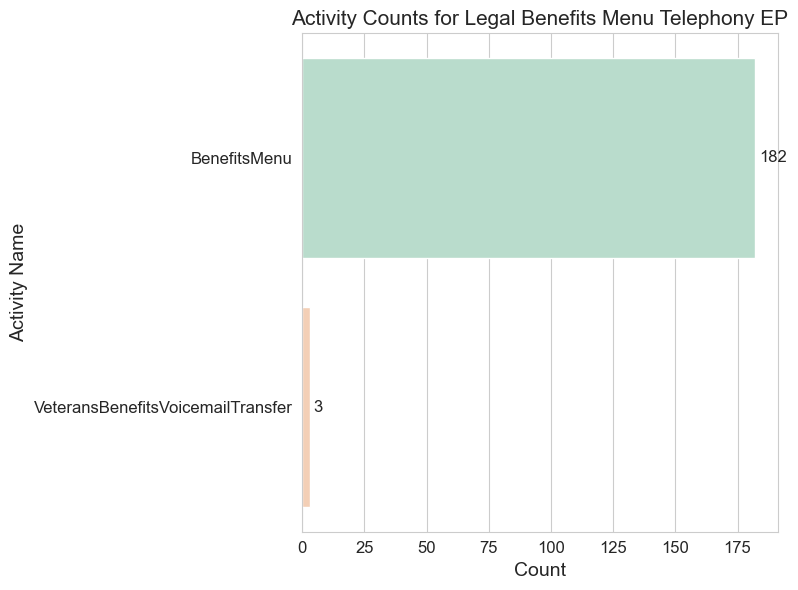

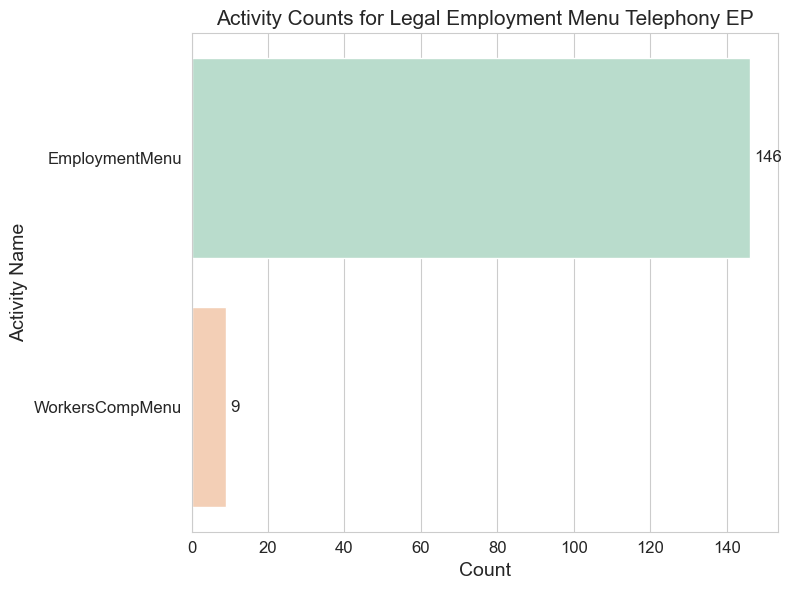

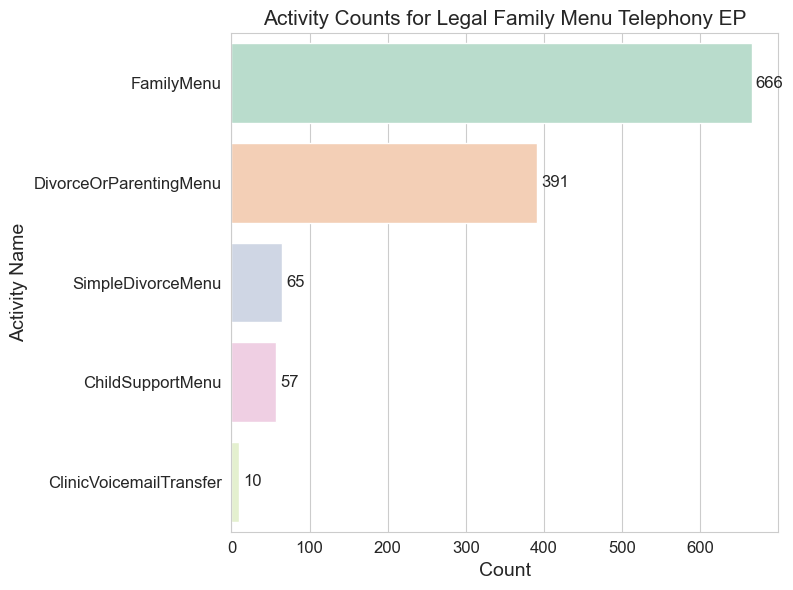

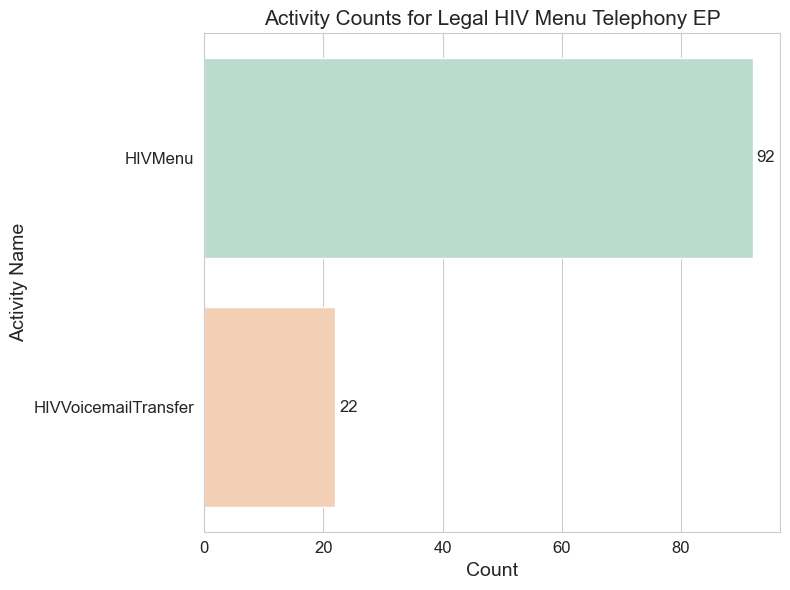

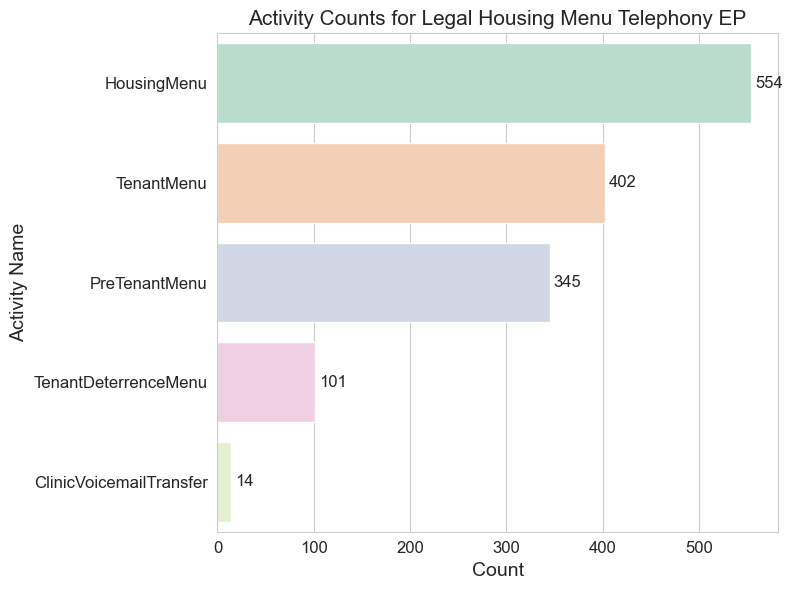

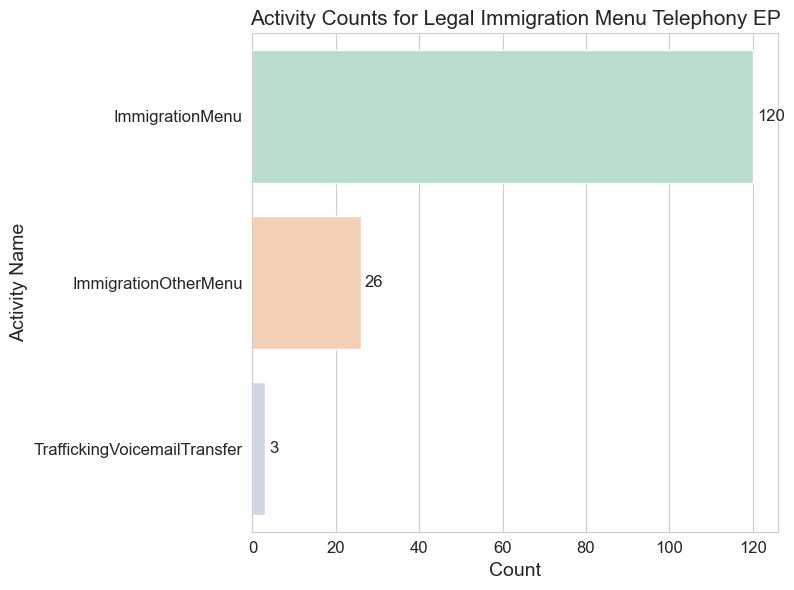

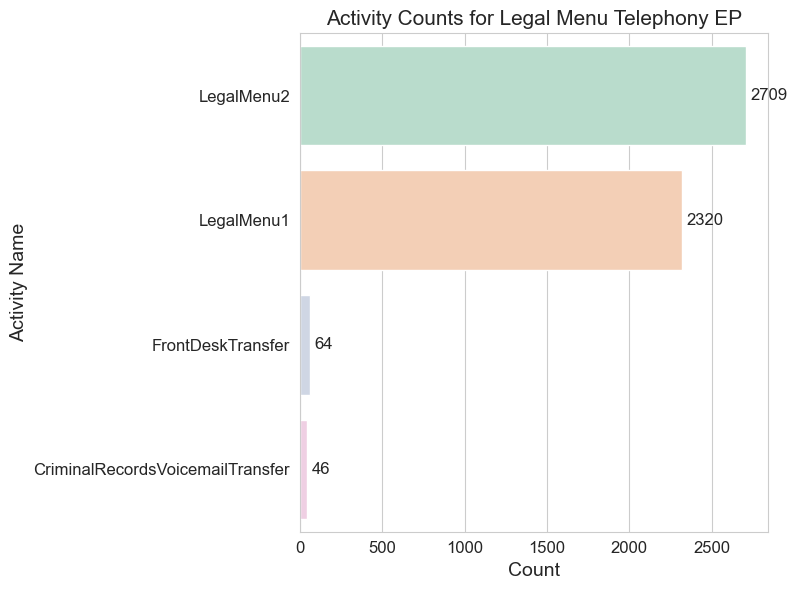

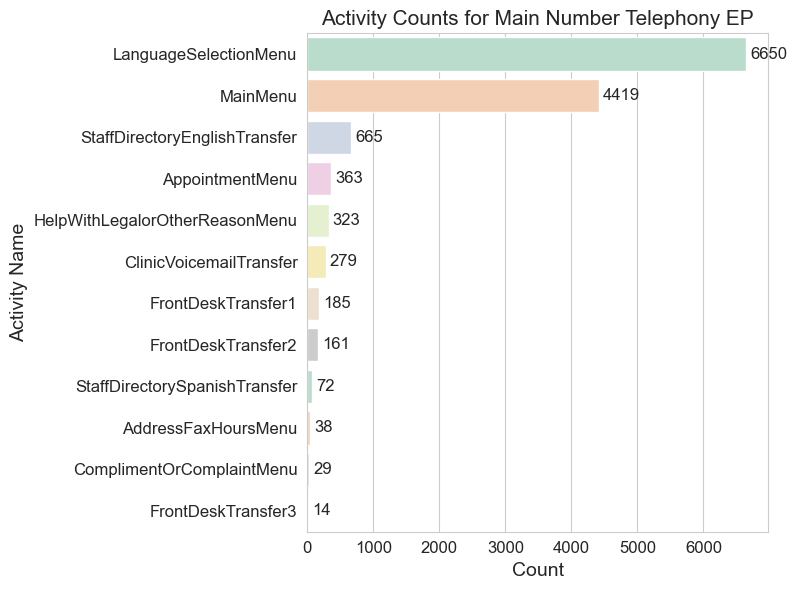

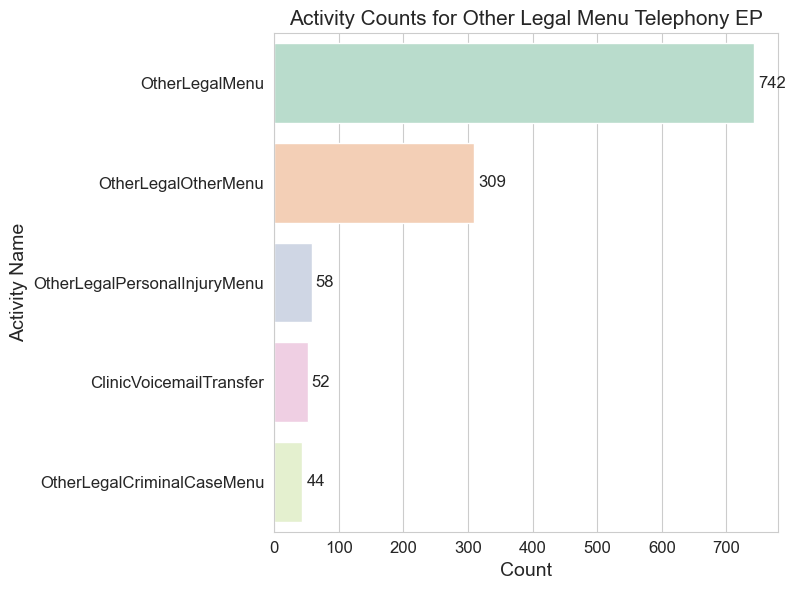

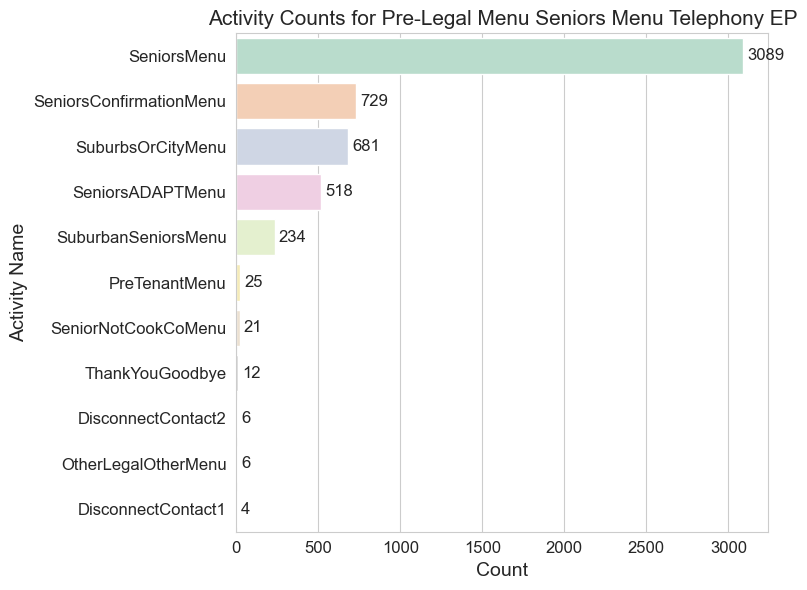

In [160]:
# Plotting activity trends for each EP name based on inputted month
activity_plots(mar_car)

In [62]:
# Reading all the Legal Menu Summary Information
may_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-05).xlsx', dtype=str, keep_default_na=False)
june_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-06).xlsx', dtype=str, keep_default_na=False)
july_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-07).xlsx', dtype=str, keep_default_na=False)
august_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-08).xlsx', dtype=str, keep_default_na=False)
september_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-09).xlsx', dtype=str, keep_default_na=False)
october_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-10).xlsx', dtype=str, keep_default_na=False)
november_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-11).xlsx', dtype=str, keep_default_na=False)
december_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2024-12).xlsx', dtype=str, keep_default_na=False)
january_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2025-01).xlsx', dtype=str, keep_default_na=False)
february_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2025-02).xlsx', dtype=str, keep_default_na=False)
march_summary = pd.read_excel('Correct Legal Menu Summary Reports/Monthly Summary Report (2025-03).xlsx', dtype=str, keep_default_na=False)

In [63]:
# Function for reformating Legal Summary Reports Data
def header_cleaning(df):
    df.rename(columns={'Time Zone: (UTC-05:00) Central Daylight Time (America/Chicago)': 'Legal_Menu_Option',
                       'Time Zone: (UTC-06:00) Central Standard Time (America/Chicago)': 'Legal_Menu_Option',
                       'Unnamed: 1': 'Menu_Selection',
                       'Unnamed: 2': 'Queue_Selection',
                       'Unnamed: 3': 'Group_Suboption',
                       'Unnamed: 4': 'First_Queue_Name',
                       'Unnamed: 5': 'Final_Queue_Name',
                       'Unnamed: 6': 'Total_Calls',
                       'Unnamed: 7': 'Live_Queued_Calls',
                       'Unnamed: 8': 'Callback_Queued_Calls',
                       'Unnamed: 9': 'Closed_Queue_Calls',
                       'Unnamed: 10': 'Abandoned_Calls'
                       }, inplace= True)
    df = df.iloc[2:]
    df.replace('', pd.NA, inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.reset_index(inplace = True, drop = True)
    return df

In [64]:
# Reformatting Legal Summary Reports Data for each month
january_summary = header_cleaning(january_summary)
february_summary = header_cleaning(february_summary)
march_summary = header_cleaning(march_summary)
may_summary = header_cleaning(may_summary)
june_summary = header_cleaning(june_summary)
july_summary = header_cleaning(july_summary)
august_summary = header_cleaning(august_summary)
september_summary = header_cleaning(september_summary)
october_summary = header_cleaning(october_summary)
november_summary = header_cleaning(november_summary)

In [65]:
# Combining Legal Summary Reports Data for all months into one dataframe
all_datasets = [january_summary, february_summary, march_summary, may_summary, june_summary, july_summary, august_summary, september_summary, october_summary, november_summary]
combined = pd.DataFrame(columns=january_summary.columns)
for dataset in all_datasets:
    combined = pd.concat([combined, dataset[:len(dataset) - 1]], axis = 0)

In [66]:
# Function for computing the proportion of Closed Queue calls that are Clinic Voicemail Transfers
def clinic_voicemail_closed_queue(dataset, total):
    if not total:
        dataset = dataset[:len(dataset) - 1]

    dataset['Closed_Queue_Calls'] = dataset['Closed_Queue_Calls'].apply(lambda x: int(x))
    total = dataset[['Legal_Menu_Option', 'Closed_Queue_Calls']].groupby(['Legal_Menu_Option'], as_index= False).sum()

    clinic = dataset.loc[dataset['Final_Queue_Name'] == "Clinic Voicemail Transfer", :].groupby(['Legal_Menu_Option'], as_index= False).sum()[['Legal_Menu_Option', 'Closed_Queue_Calls']]

    combined = total.merge(clinic, on = "Legal_Menu_Option", how = 'inner')
    combined['proportion'] = np.round(combined['Closed_Queue_Calls_y']/combined['Closed_Queue_Calls_x'], 2)
    return combined


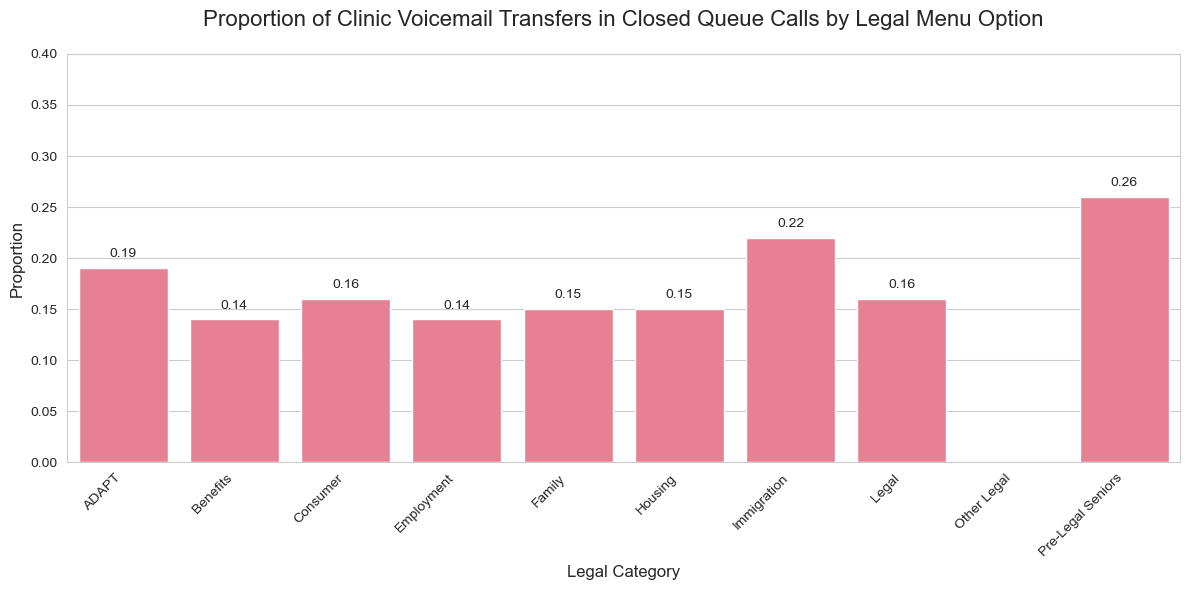

In [67]:
# Plotting the proportion of Closed Queue calls that are Clinic Voicemail Transfers

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")

ax = sns.barplot(x='Legal_Menu_Option', y='proportion', data=clinic_voicemail_closed_queue(combined, True))

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Customize the plot
plt.title('Proportion of Clinic Voicemail Transfers in Closed Queue Calls by Legal Menu Option', fontsize=16, pad=20)
plt.xlabel('Legal Category', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 0.4)  # Set consistent y-axis limit

# Add some padding below for the rotated x-labels
plt.tight_layout()

plt.show()

In [68]:
# Function for computing the proportion of total calls that are closed queue calls vs abandoned calls
def closed_queue_abandoned_call_proportion(dataset, total):
    if not total:
        dataset = dataset[:len(dataset) - 1]

    dataset[['Closed_Queue_Calls', 'Total_Calls', 'Abandoned_Calls']] = combined[['Closed_Queue_Calls', 'Total_Calls', 'Abandoned_Calls']].astype(int)
    df = dataset[['Legal_Menu_Option', 'Closed_Queue_Calls', 'Total_Calls', 'Abandoned_Calls']].groupby(['Legal_Menu_Option']).sum()

    df['Closed_Queue_Proportion'] = df['Closed_Queue_Calls']/df['Total_Calls']
    df['Abandoned_Calls_Proportion'] = df['Abandoned_Calls']/df['Total_Calls']

    return df.reset_index()

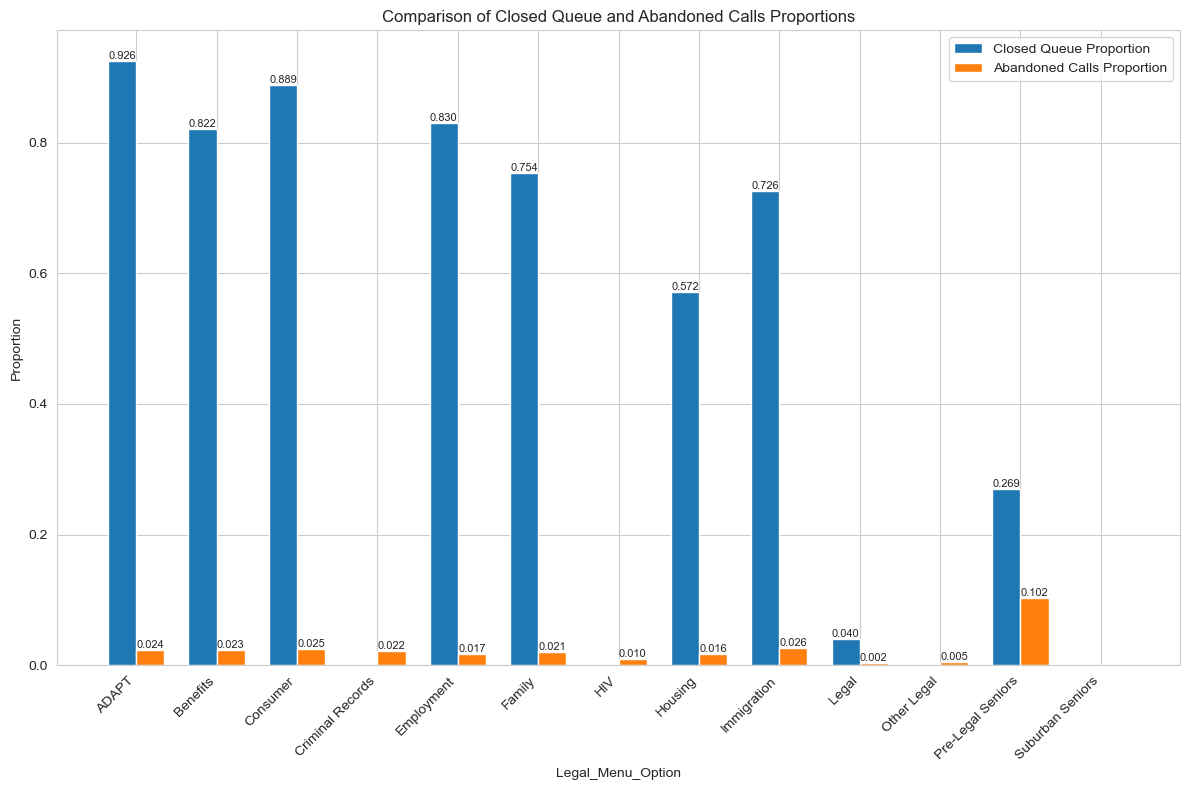

In [69]:
# Plotting the proportion of total calls that are closed queue calls vs abandoned calls
df = closed_queue_abandoned_call_proportion(combined, True)

plt.figure(figsize=(12, 8))

x = np.arange(len(df))
width = 0.35

bars1 = plt.bar(x - width/2, df['Closed_Queue_Proportion'], width, 
               label='Closed Queue Proportion', color='#1f77b4')
bars2 = plt.bar(x + width/2, df['Abandoned_Calls_Proportion'], width, 
               label='Abandoned Calls Proportion', color='#ff7f0e')

plt.xlabel('Legal_Menu_Option')
plt.ylabel('Proportion')
plt.title('Comparison of Closed Queue and Abandoned Calls Proportions')
plt.xticks(x, df['Legal_Menu_Option'], rotation=45, ha='right')
plt.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
